# Задание 1.0

## Подключаем нужные библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
import plotly.express as px
# pd.options.plotting.backend = "plotly"

## Загружаем Dataset

In [2]:
df = pd.read_csv("loan_train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [4]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

удаляю строки с категоральными значениями None

In [5]:
df = df.dropna()

In [6]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,499.000000
mean,5.336128e+05,1.566996e+05,1.395251e+07,342.012024,0.851703
std,5.618157e+05,2.580955e+05,8.345237e+06,64.860368,0.355750
min,1.500000e+04,0.000000e+00,0.000000e+00,36.000000,0.000000
25%,2.885500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000
50%,3.859000e+05,1.086000e+05,1.260000e+07,360.000000,1.000000
75%,5.825000e+05,2.251500e+05,1.665000e+07,360.000000,1.000000
max,8.100000e+06,3.383700e+06,6.000000e+07,480.000000,1.000000


# Задание 1.1
Выбрать и обосновать метрику для измерения качества

Комментарий: В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения). 

Критерии оценки:

- Предложена метрика - 5 баллов
- Присутствует корректное обоснование - 5 баллов

Ответ: Для выполения задания был выбран дата-сет для классификации выдать заем или нет. Таким образом потребуются метрики для задач классификации:
- classification report
- accuracy

Так как это позволяет оценить на сколько корректно и точно определяется то или иное состояние (выдача  или отказ), а также понять сколько ложноположительных или ложноотрицательных по отношению к правильным ответам тестовой выборки.

# Задание 1.2

Провести EDA на своих данных

Комментарий: В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

- Рассмотрены базовые характеристики/статистики для набора данных - 2 балла
- Реализованы наиболее релевантные визуализации - 4 балла
- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп) - 4 балла
- Продемонстрировать использование библиотеки plotly для визуализации

Ответ:

Рассмотренны категоральные признаки как вместе так и разделерные по полу, образованию и браку

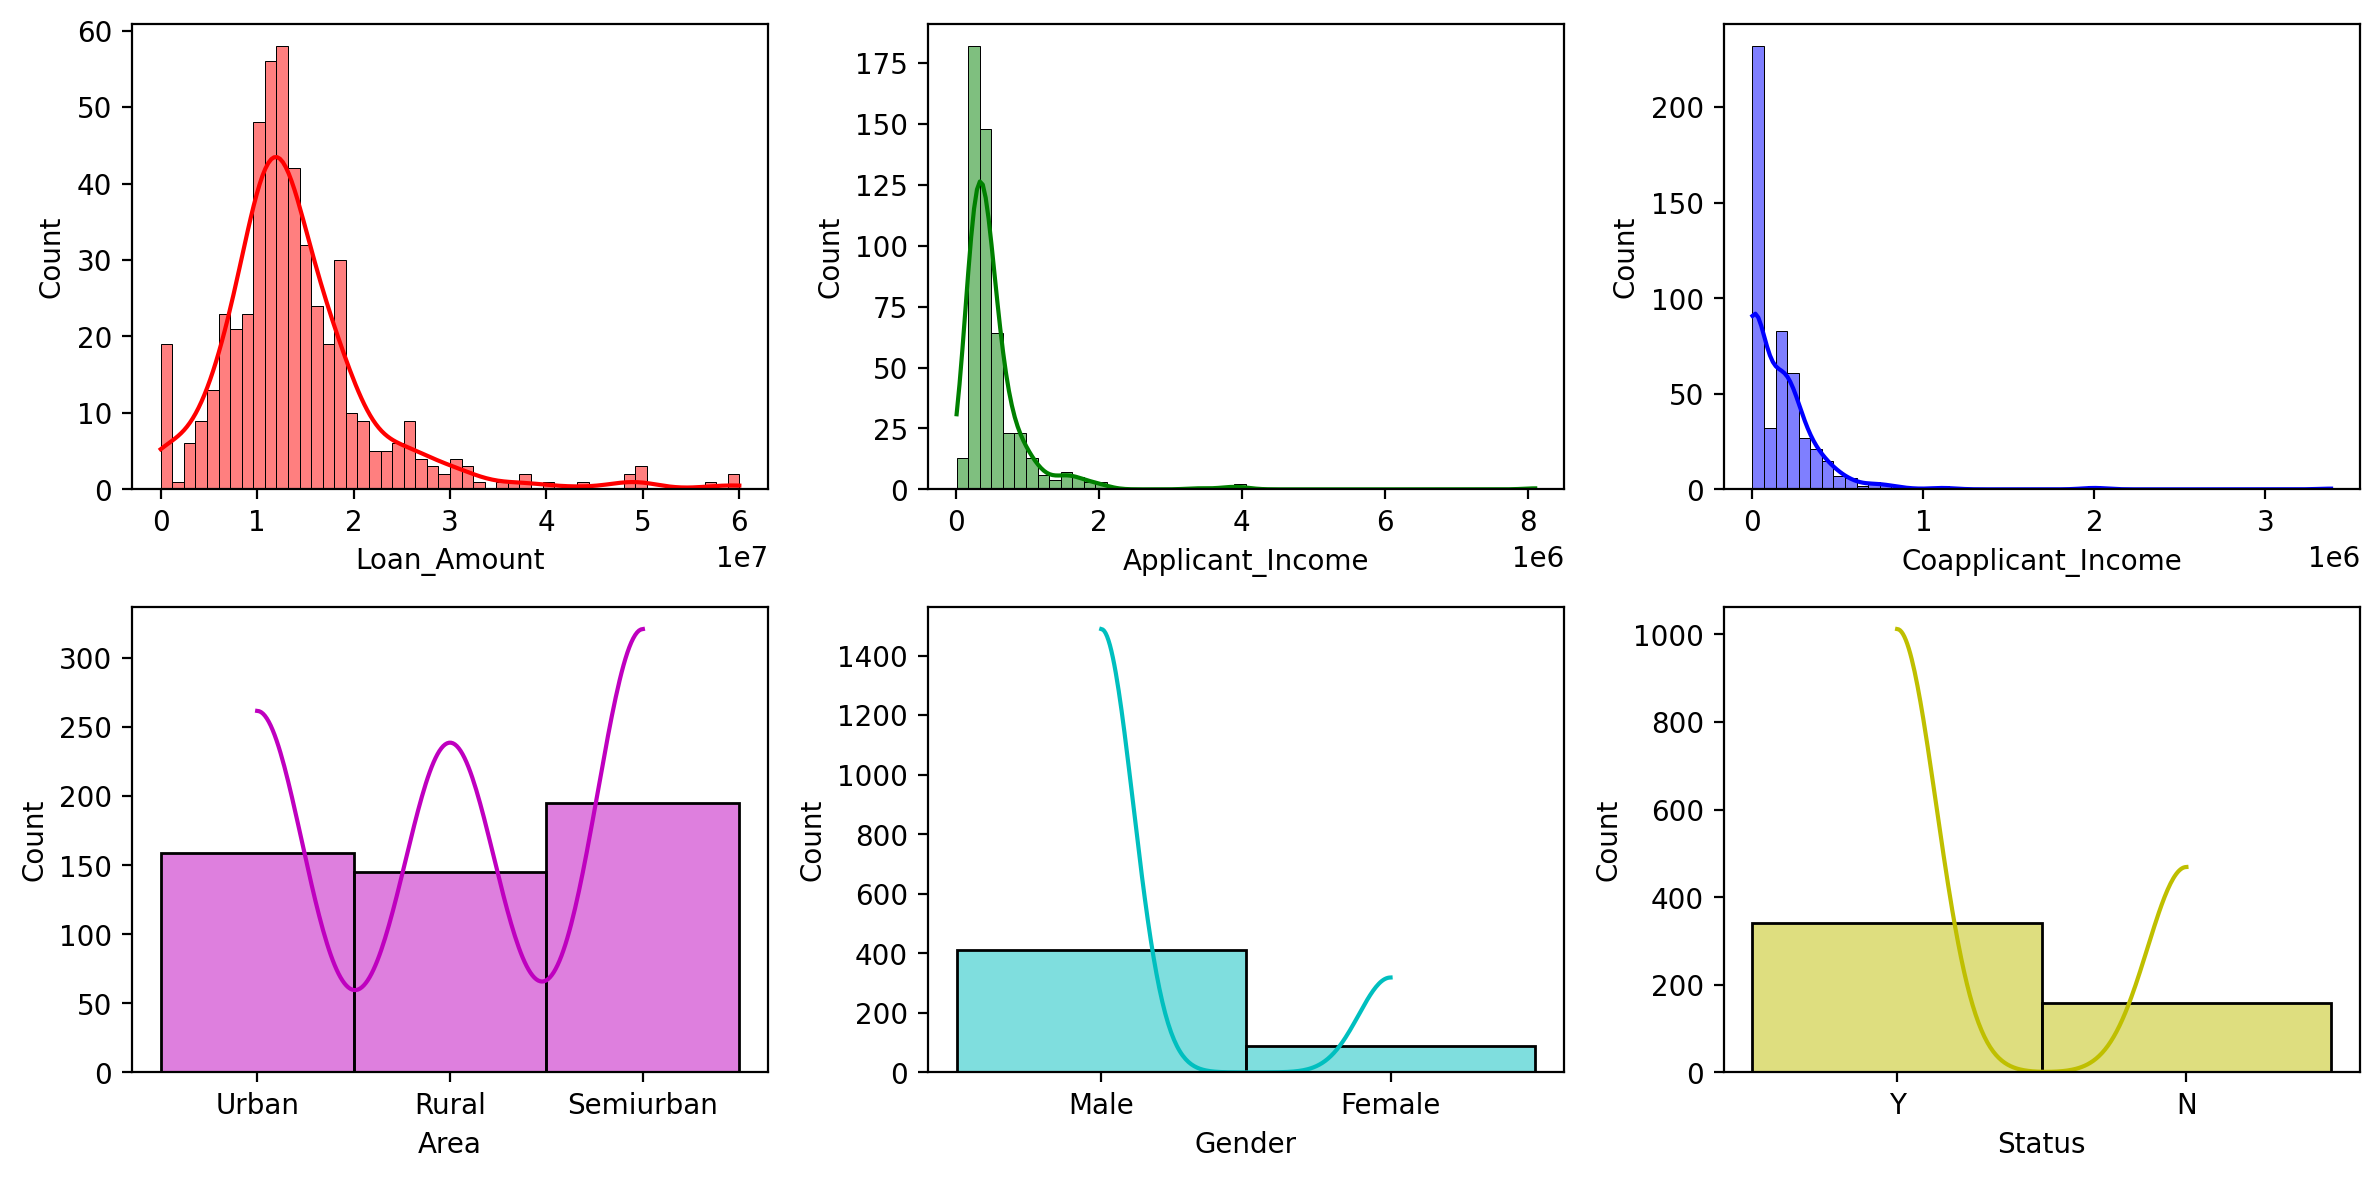

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 6), dpi=200)
sns.histplot(df["Loan_Amount"], bins=50, kde=True, color='r', ax=axes[0,0])
sns.histplot(df["Applicant_Income"], bins=50, kde=True, color='g', ax=axes[0,1])
sns.histplot((df["Coapplicant_Income"]), bins=50, kde=True, color='b', ax=axes[0,2])
sns.histplot((df['Area']), bins=3, kde=True, color='m', ax=axes[1,0])
sns.histplot((df['Gender']), bins=2, kde=True, color='c', ax=axes[1,1])
sns.histplot((df['Status']), bins=2, kde=True, color='y', ax=axes[1,2])
plt.tight_layout()

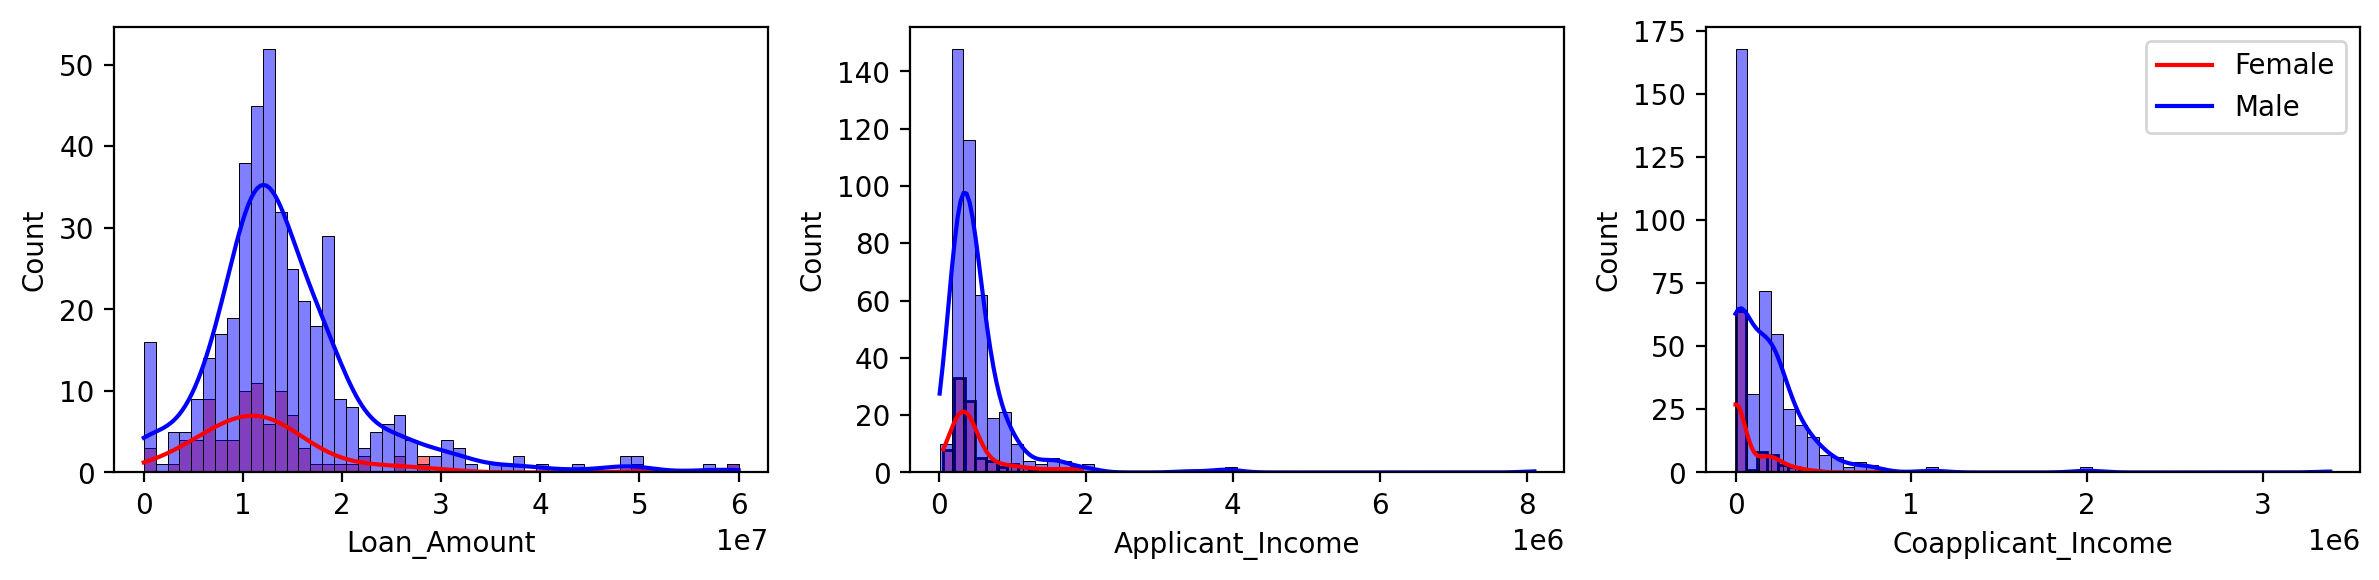

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3), dpi=200)
sns.histplot(df[df['Gender']=='Female']['Loan_Amount'], bins=50, kde=True, color='r', ax=axes[0])
sns.histplot(df[df['Gender']=='Male']['Loan_Amount'], bins=50, kde=True, color='b', ax=axes[0])
sns.histplot(df[df['Gender']=='Female']['Applicant_Income'], bins=13, kde=True, color='r', ax=axes[1])
sns.histplot(df[df['Gender']=='Male']['Applicant_Income'], bins=50, kde=True, color='b', ax=axes[1])
sns.histplot(df[df['Gender']=='Female']["Coapplicant_Income"], bins=15, kde=True, color='r', ax=axes[2])
sns.histplot(df[df['Gender']=='Male']["Coapplicant_Income"], bins=50, kde=True, color='b', ax=axes[2])
plt.legend(['Female','Male'])
plt.tight_layout()

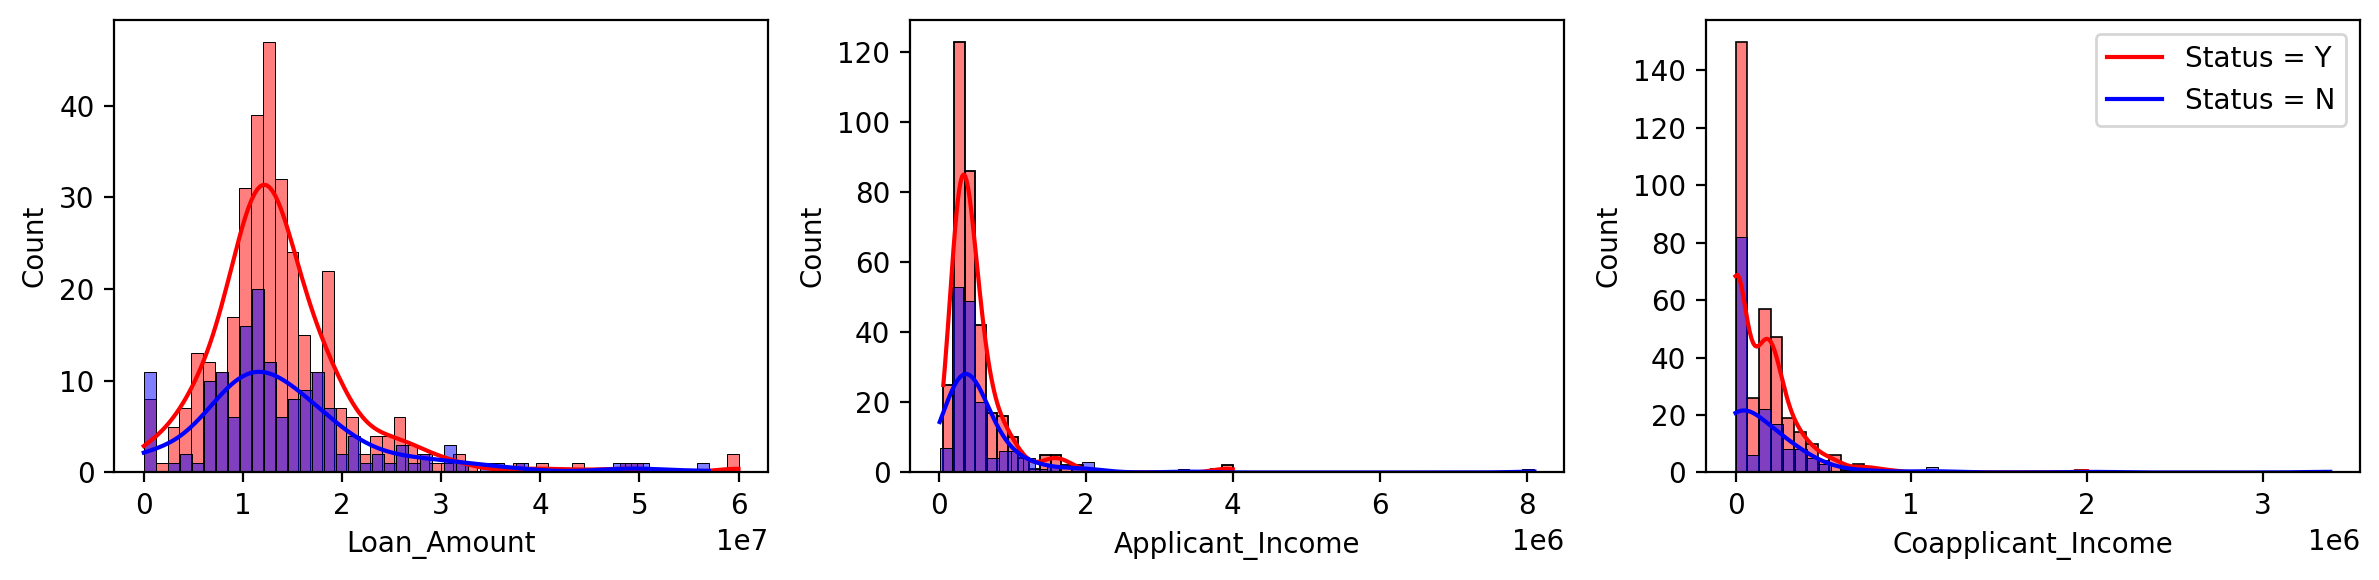

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3), dpi=200)
sns.histplot(df[df['Status']=='Y']['Loan_Amount'], bins=50, kde=True, color='r', ax=axes[0])
sns.histplot(df[df['Status']=='N']['Loan_Amount'], bins=47, kde=True, color='b', ax=axes[0])
sns.histplot(df[df['Status']=='Y']['Applicant_Income'], bins=27, kde=True, color='r', ax=axes[1])
sns.histplot(df[df['Status']=='N']['Applicant_Income'], bins=50, kde=True, color='b', ax=axes[1])
sns.histplot(df[df['Status']=='Y']["Coapplicant_Income"], bins=30, kde=True, color='r', ax=axes[2])
sns.histplot(df[df['Status']=='N']["Coapplicant_Income"], bins=50, kde=True, color='b', ax=axes[2])
plt.legend(['Status = Y','Status = N'])
plt.tight_layout()

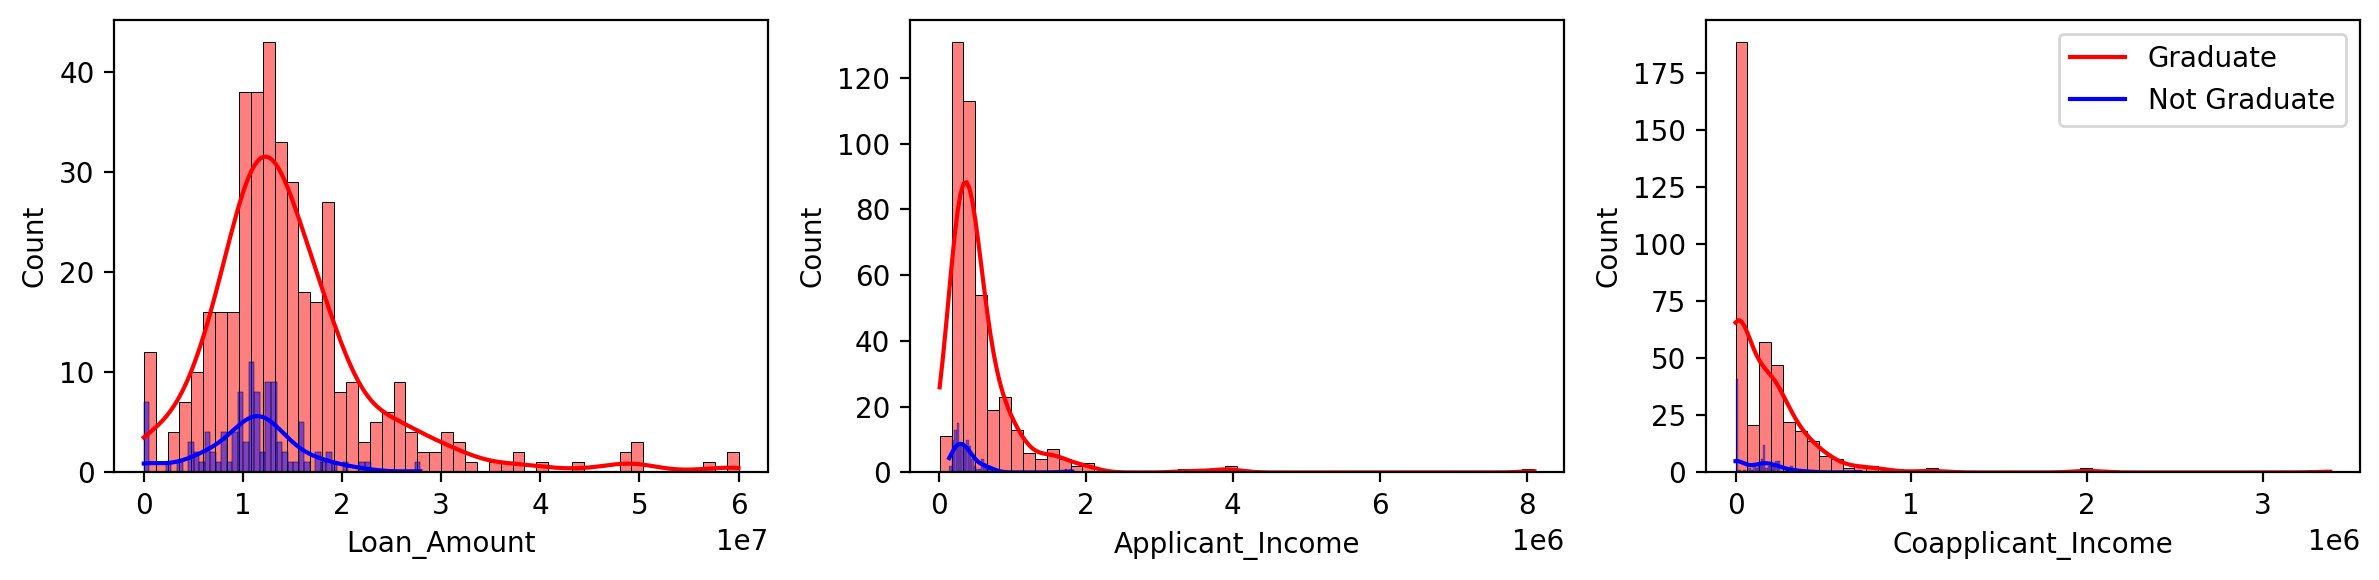

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3), dpi=200)
sns.histplot(df[df['Education']=='Graduate']['Loan_Amount'], bins=50, kde=True, color='r', ax=axes[0])
sns.histplot(df[df['Education']=='Not Graduate']['Loan_Amount'], bins=50, kde=True, color='b', ax=axes[0])
sns.histplot(df[df['Education']=='Graduate']['Applicant_Income'], bins=50, kde=True, color='r', ax=axes[1])
sns.histplot(df[df['Education']=='Not Graduate']['Applicant_Income'], bins=50, kde=True, color='b', ax=axes[1])
sns.histplot(df[df['Education']=='Graduate']["Coapplicant_Income"], bins=50, kde=True, color='r', ax=axes[2])
sns.histplot(df[df['Education']=='Not Graduate']["Coapplicant_Income"], bins=50, kde=True, color='b', ax=axes[2])
plt.legend(['Graduate','Not Graduate'])
plt.tight_layout()

Замена категоральных на цифровые значение для обучения

In [11]:
le = LabelEncoder()
df_encode= df.copy()
for i, f in enumerate(df.select_dtypes(include="object")):
    le.fit(df_encode[f])
    print(list(le.classes_))    
    df_encode[f] = le.fit_transform(df_encode[f])

['Female', 'Male']
['No', 'Yes']
['0', '1', '2', '3+']
['Graduate', 'Not Graduate']
['No', 'Yes']
['Rural', 'Semiurban', 'Urban']
['N', 'Y']


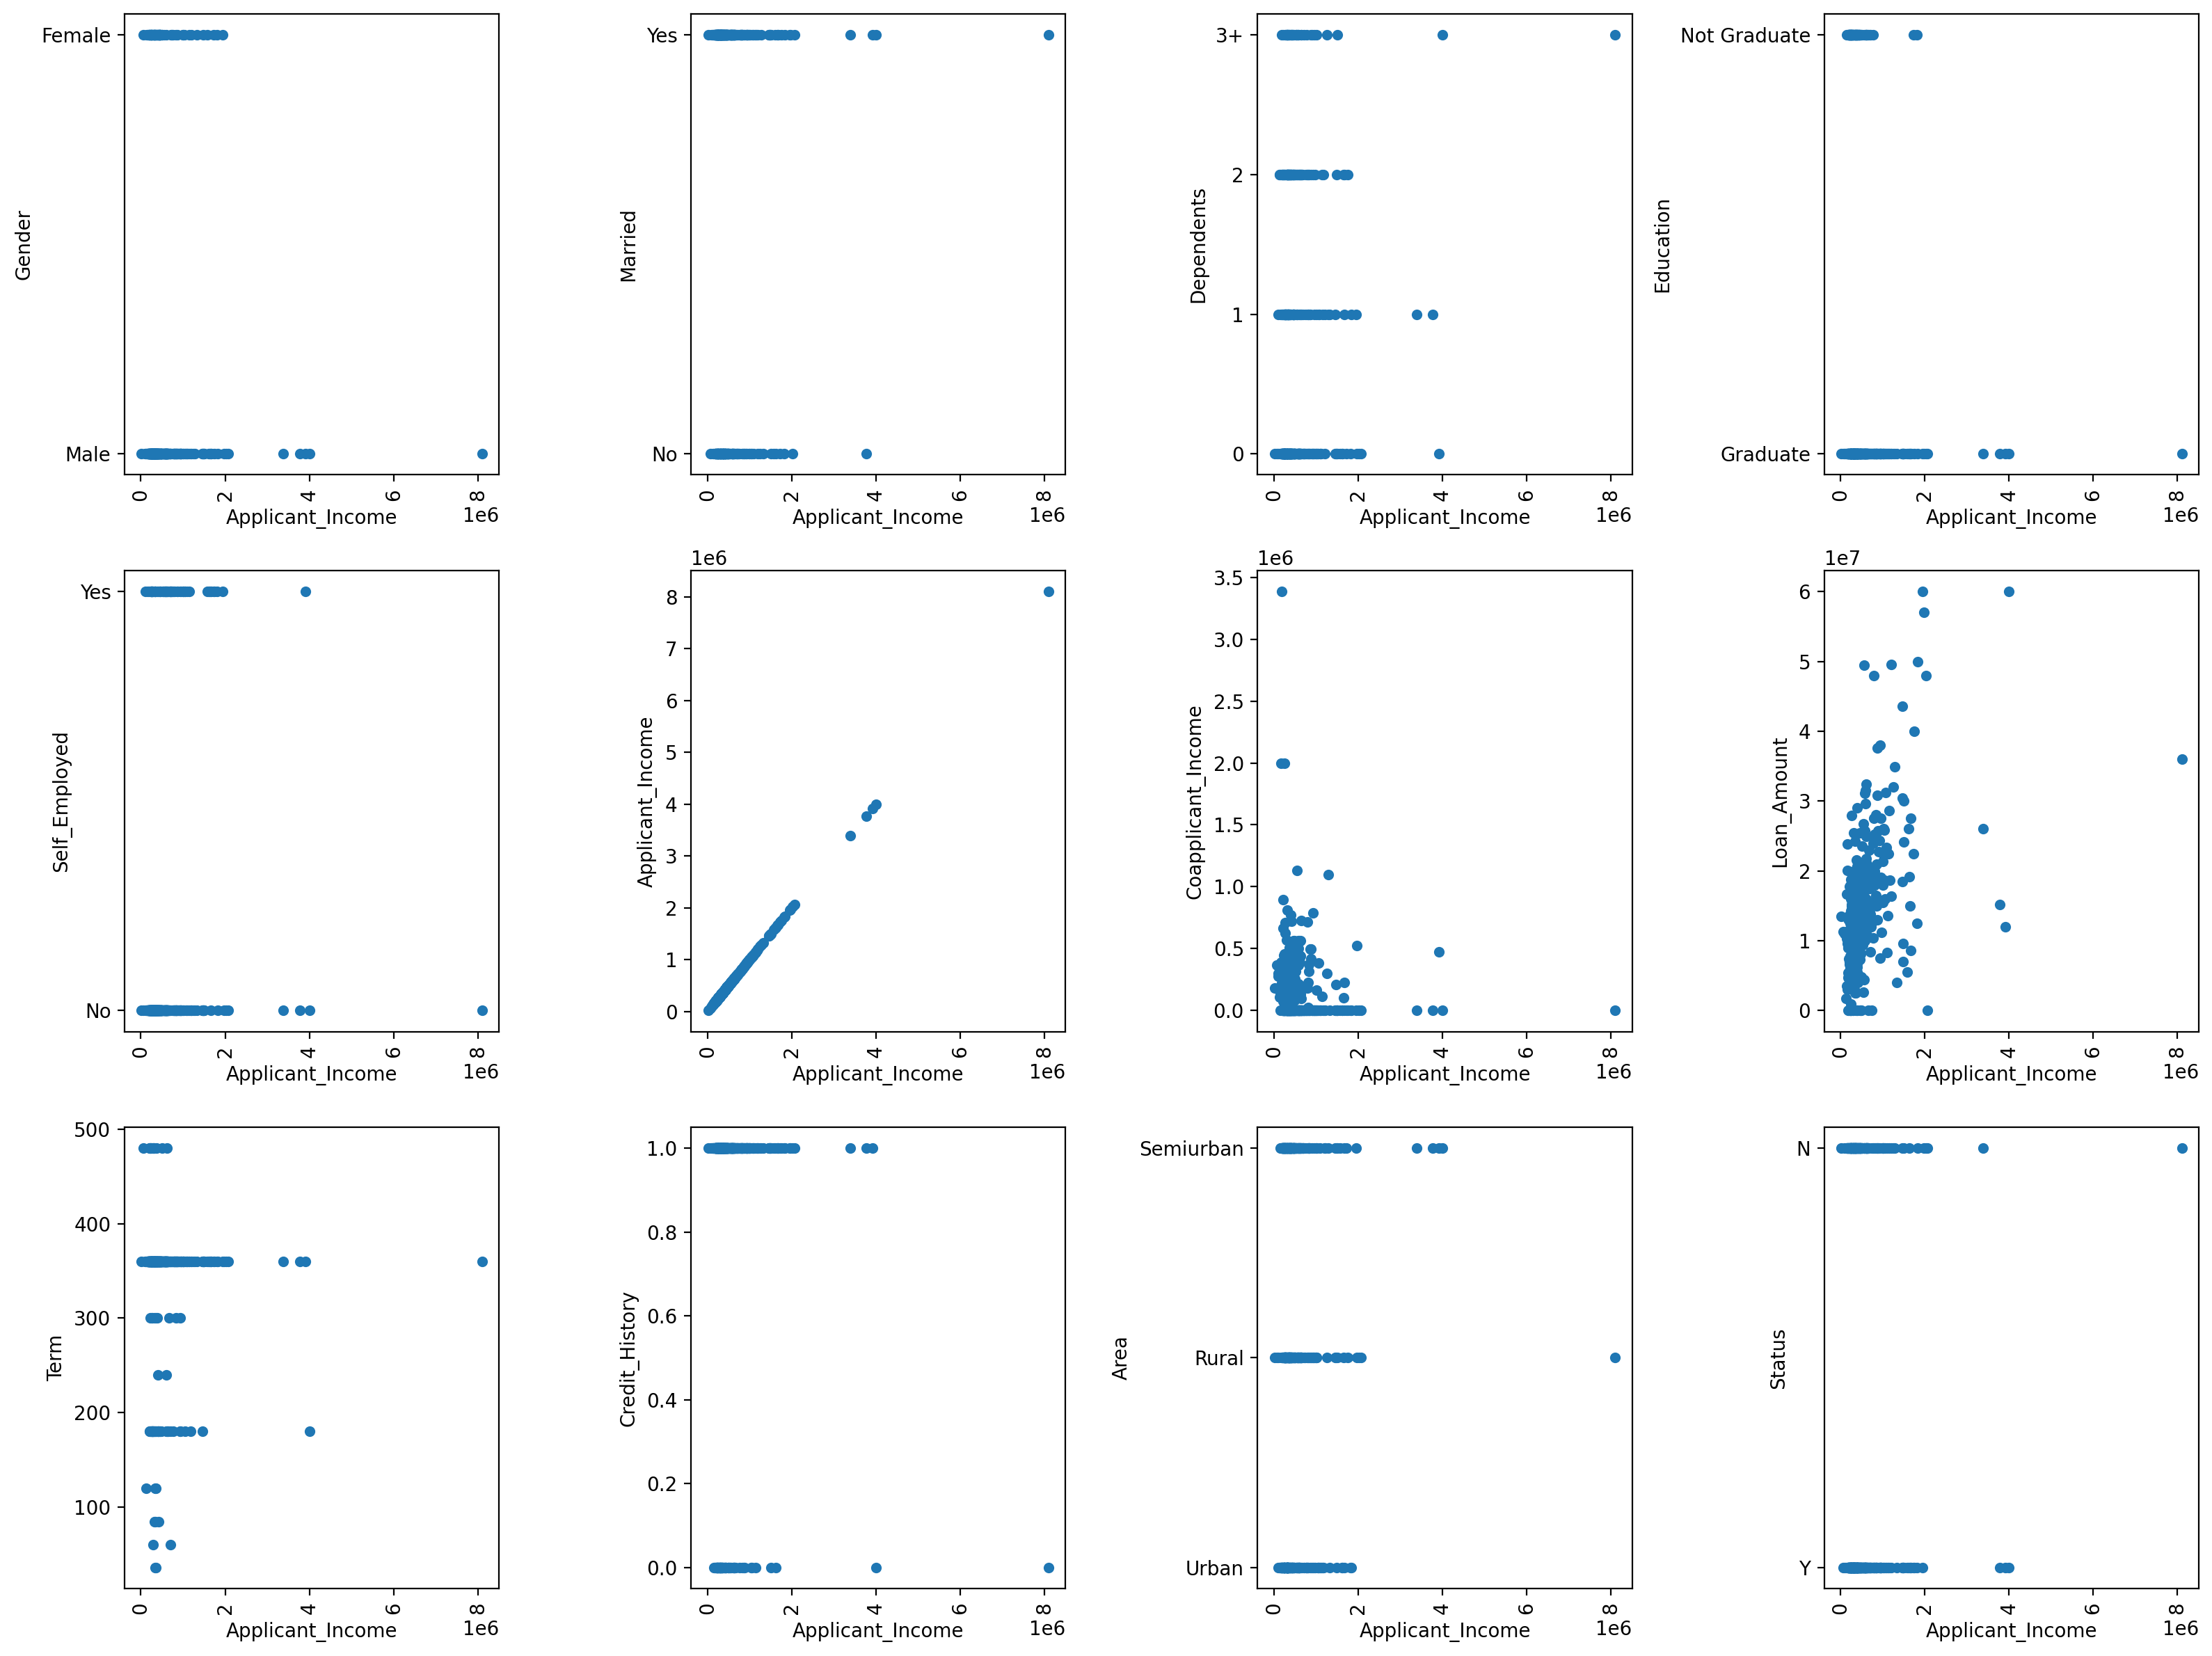

In [12]:
fig, axes = plt.subplots(figsize=(16,12), ncols=4, nrows=3, dpi=200)
for i, f in enumerate(df):
    df.plot("Applicant_Income", f, subplots=True, kind='scatter', ax = axes[i//4, i%4])
    axes[i//4, i%4].tick_params(axis='x', labelrotation=90)
plt.tight_layout()

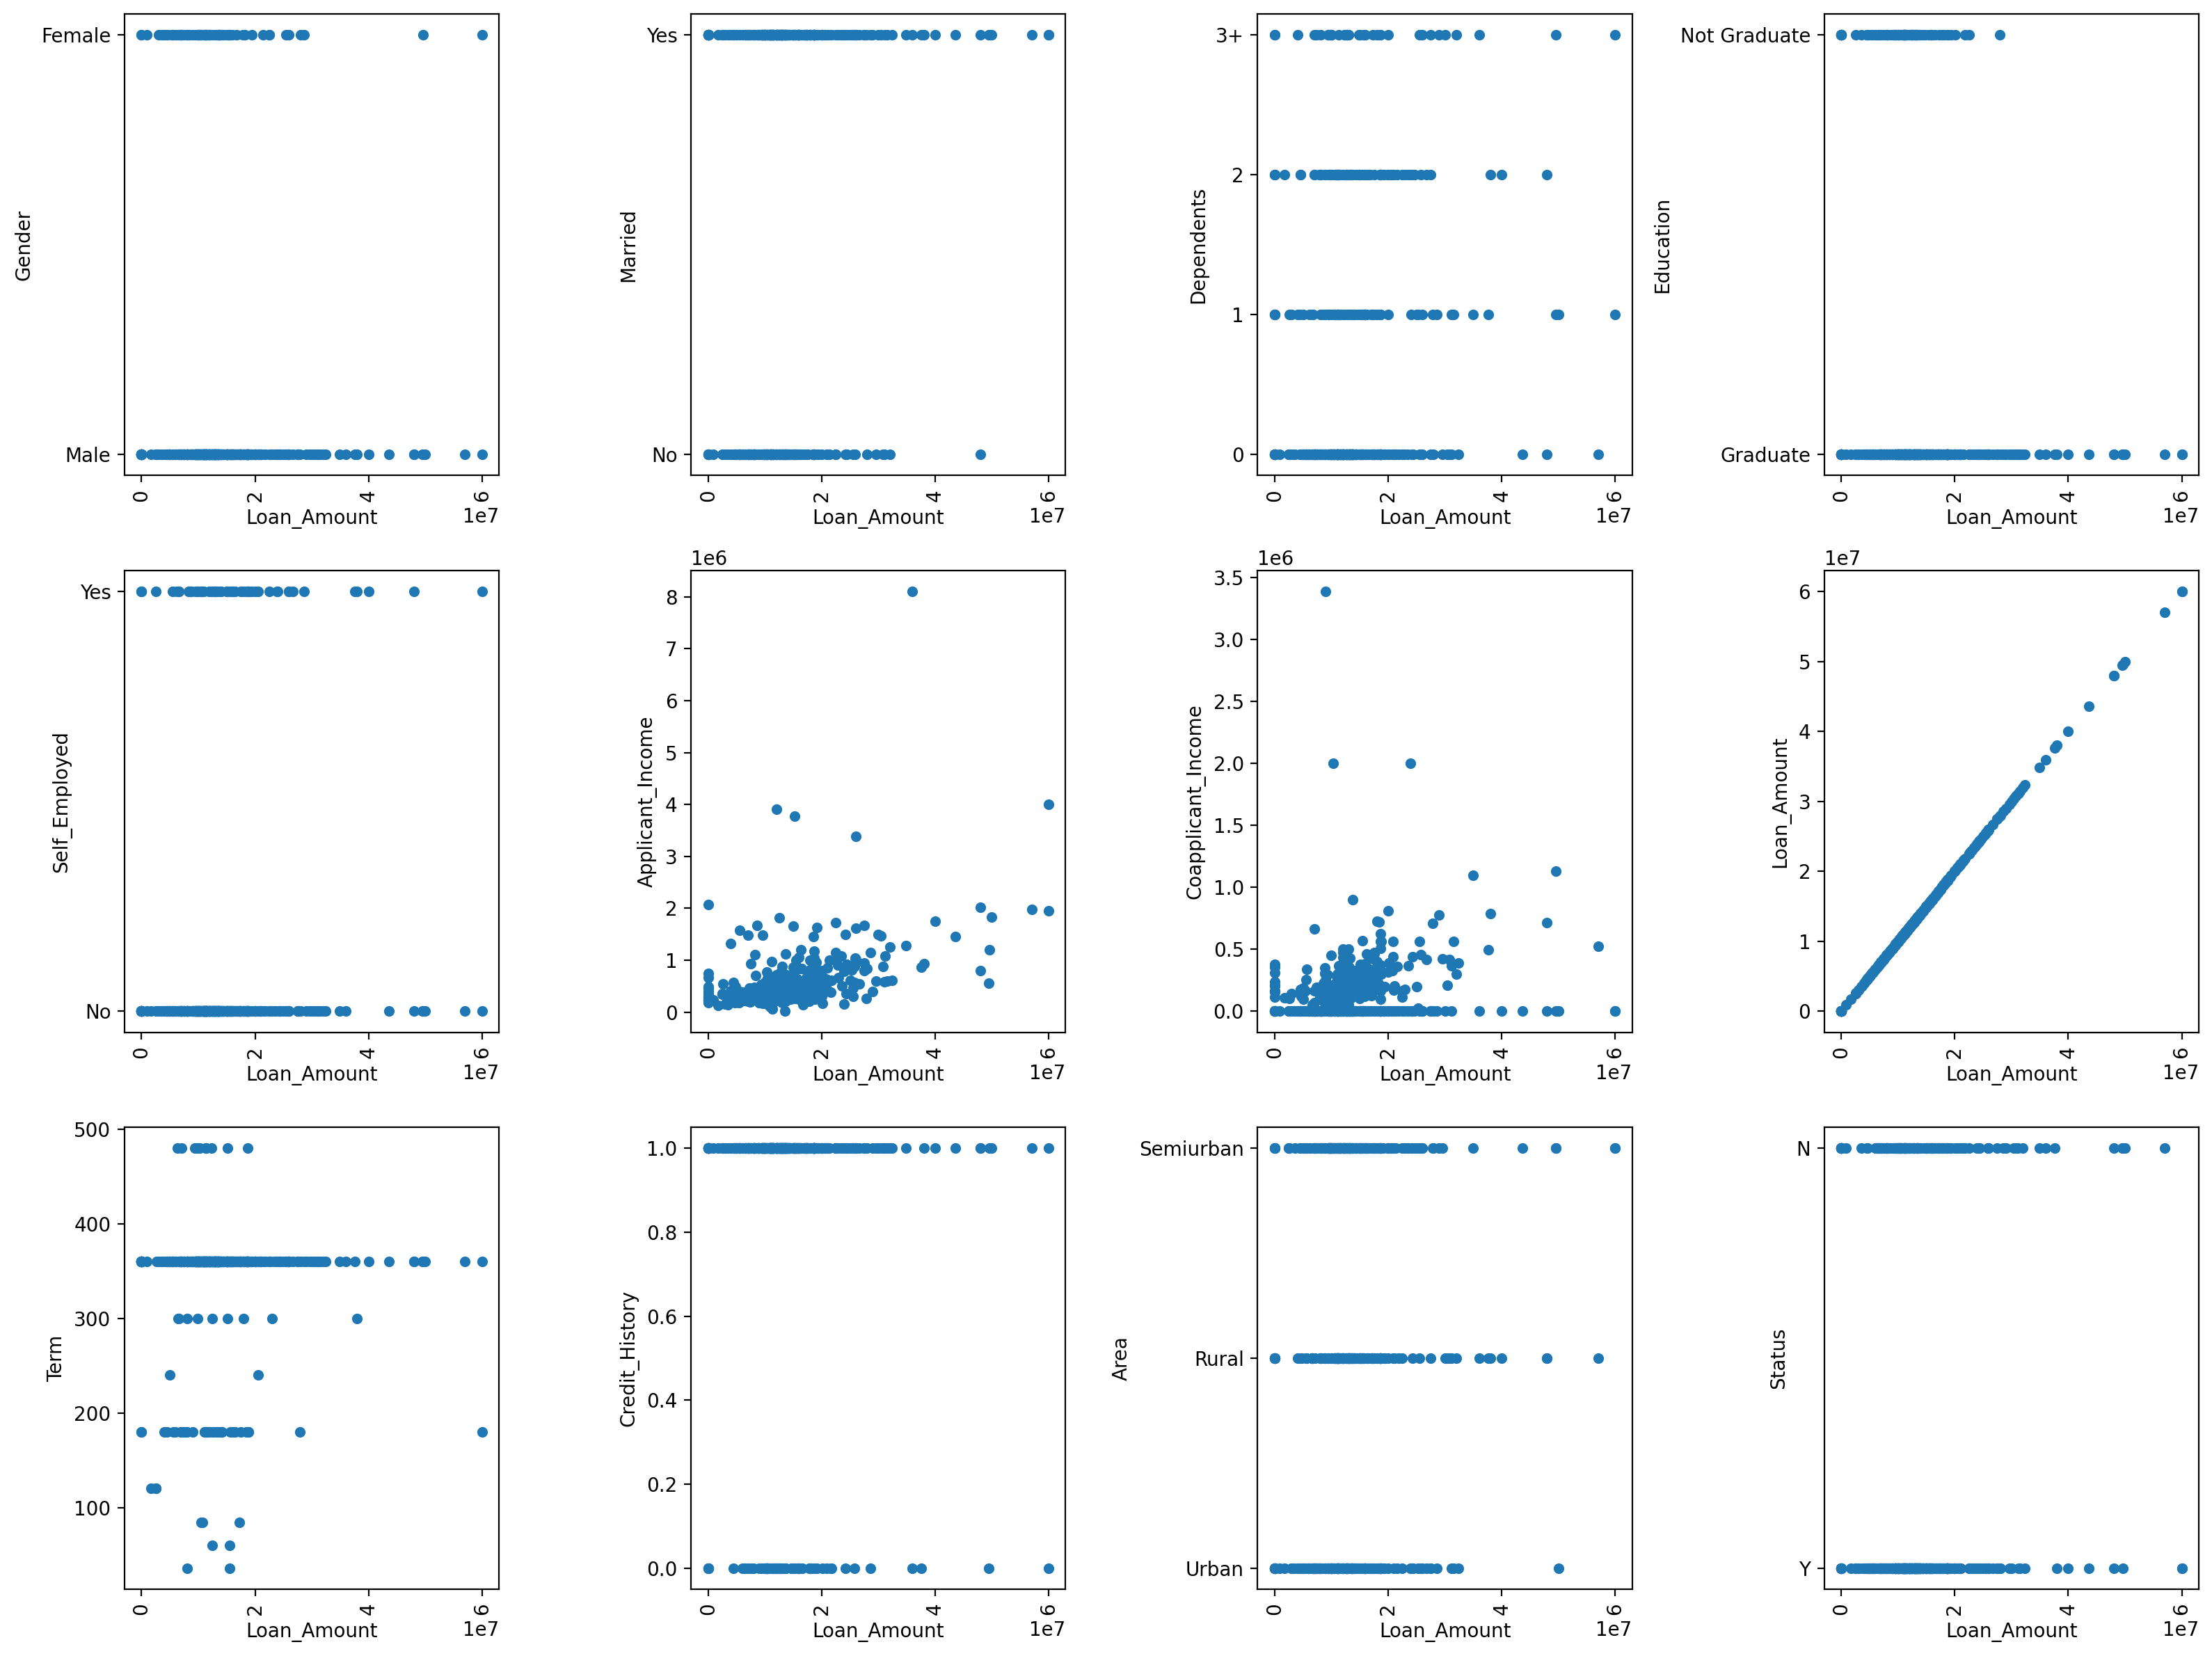

In [13]:
fig, axes = plt.subplots(figsize=(16,12), ncols=4, nrows=3, dpi=200)
for i, f in enumerate(df):
    df.plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//4, i%4])
    axes[i//4, i%4].tick_params(axis='x', labelrotation=90)
plt.tight_layout()

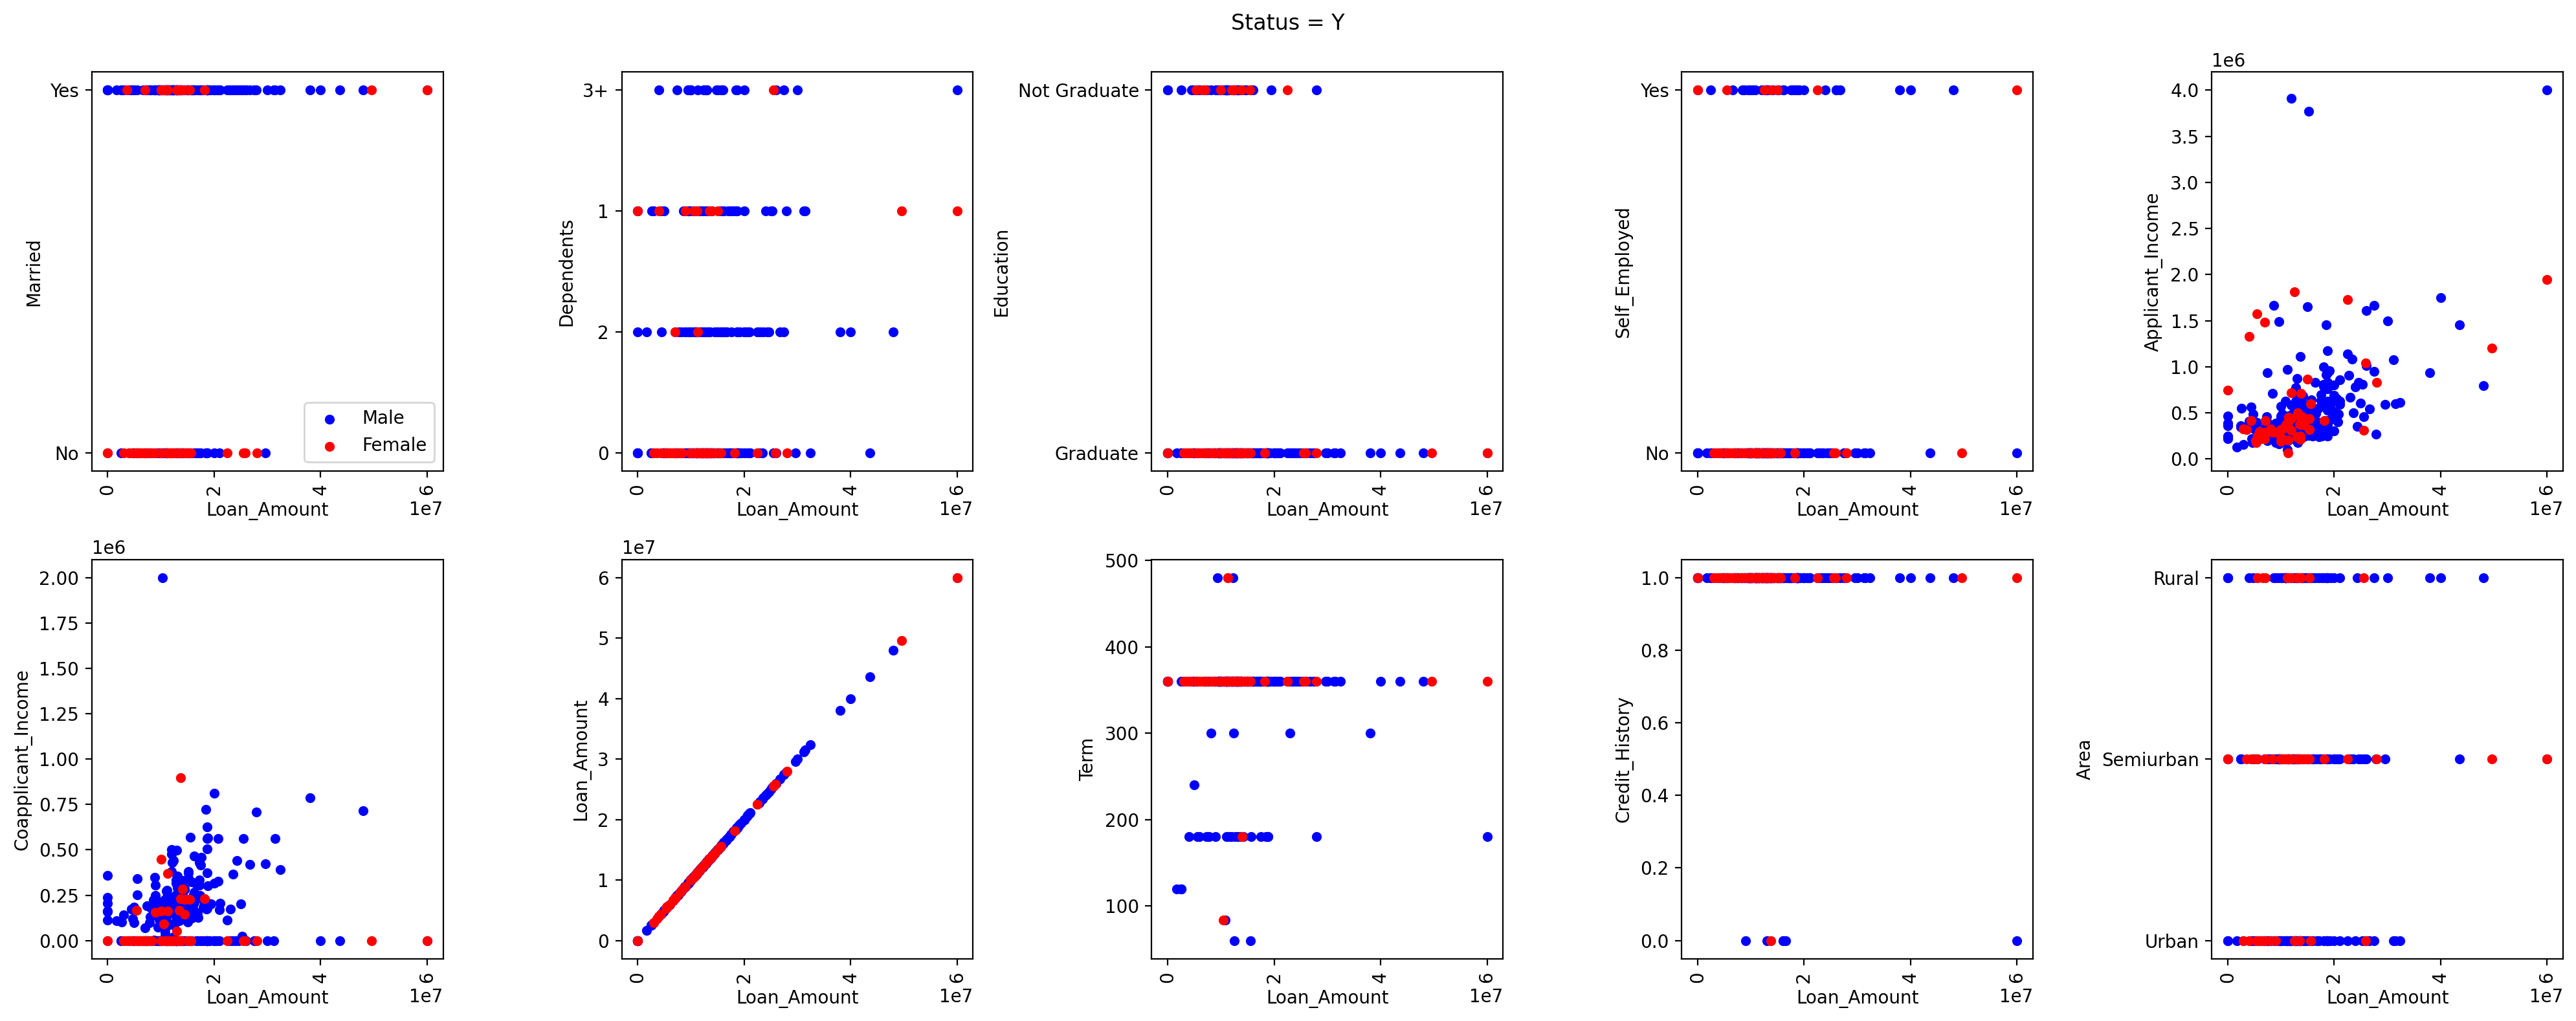

In [14]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = Y')
for i, f in enumerate(df.drop(columns=['Gender', 'Status'])):
    df[(df['Status']=='Y') * (df['Gender']=='Male')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    df[(df['Status']=='Y') * (df['Gender']=="Female")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Male', 'Female'])
plt.tight_layout()

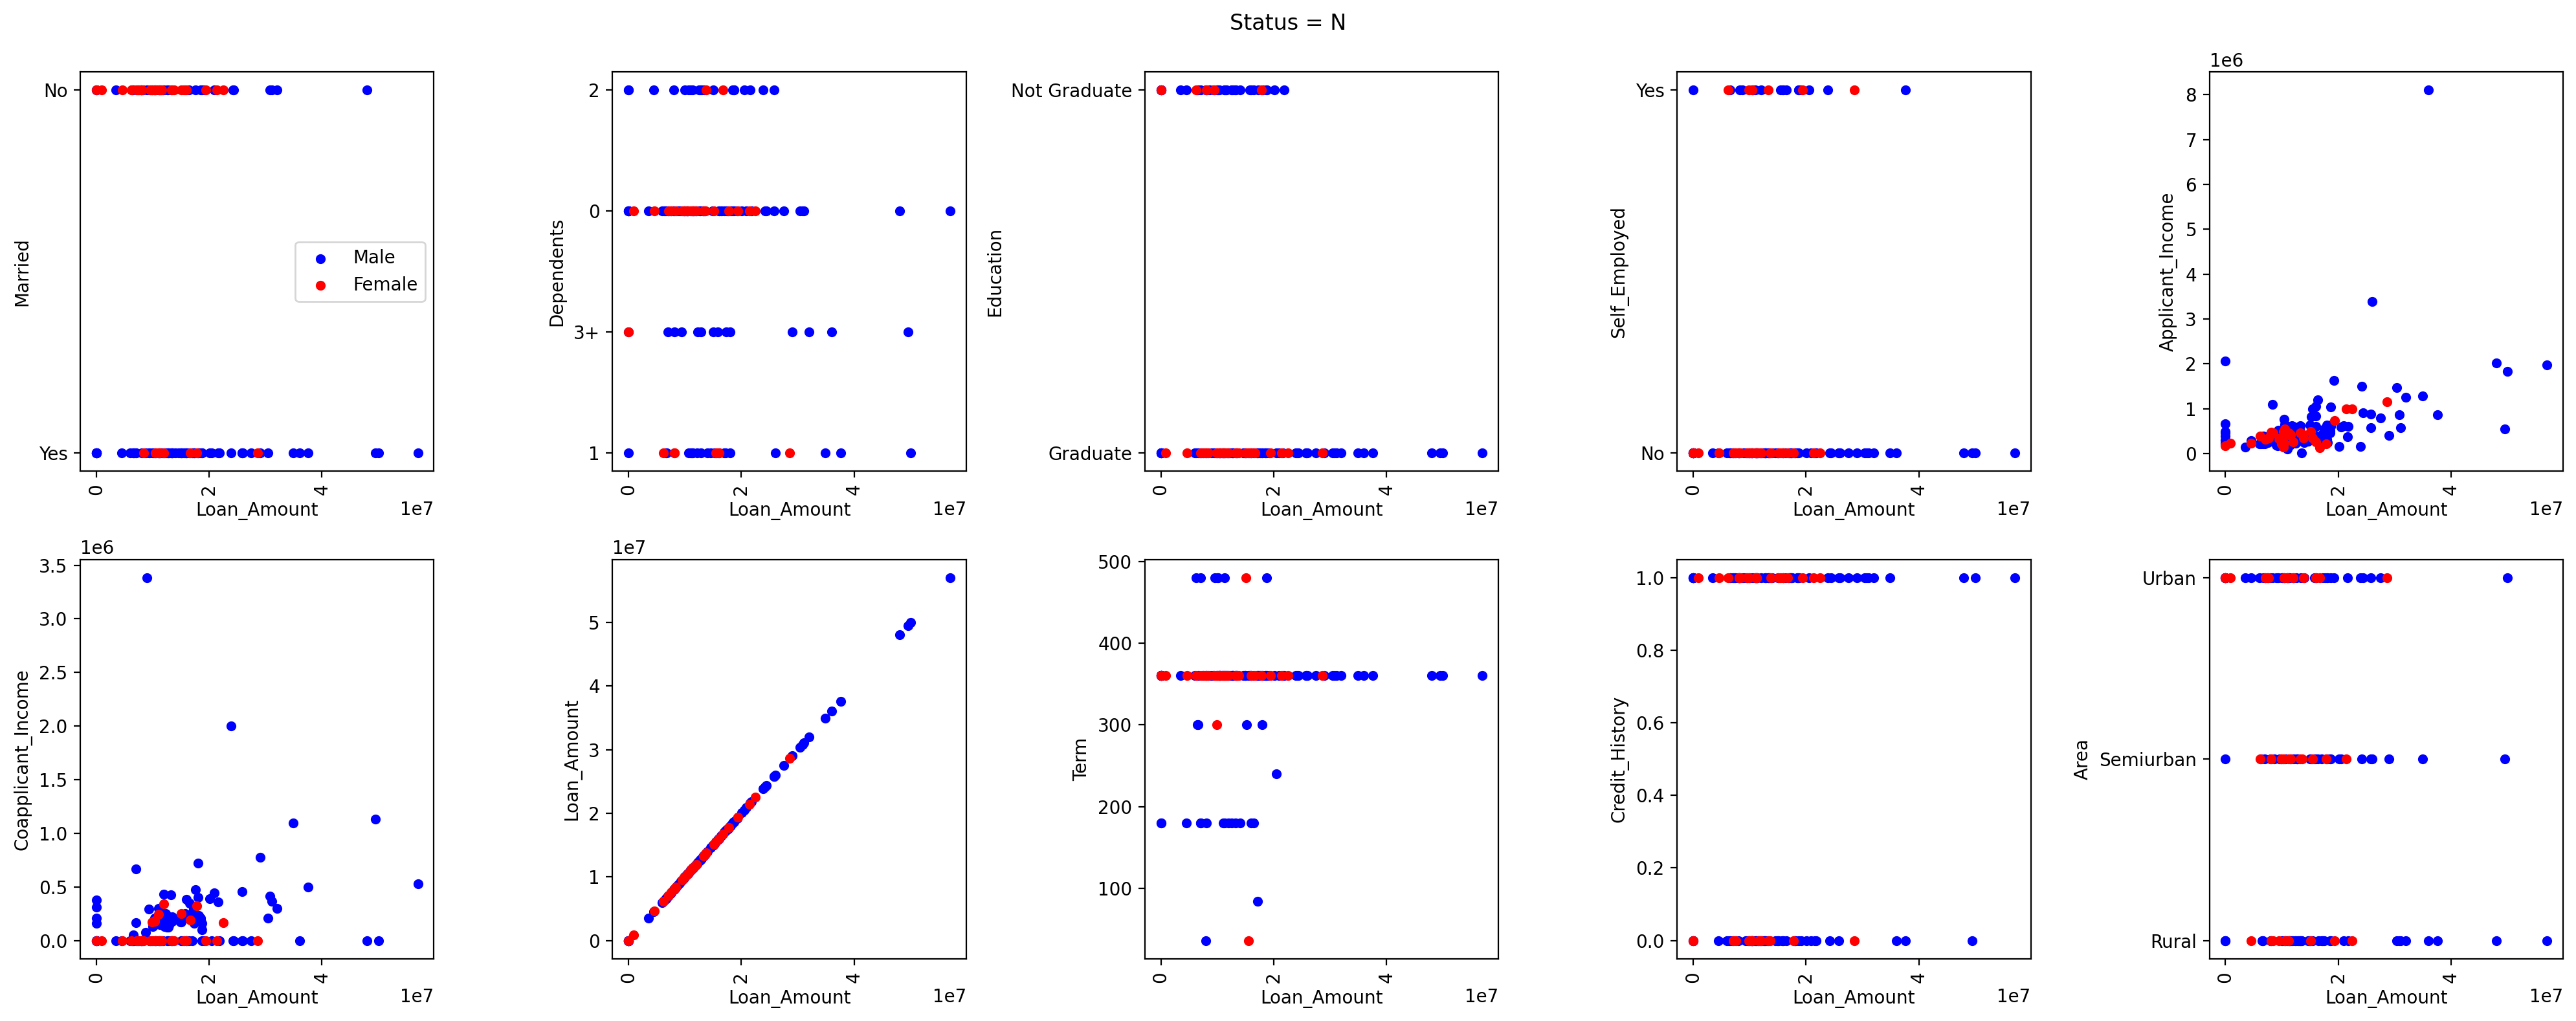

In [15]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = N')
for i, f in enumerate(df.drop(columns=['Gender', 'Status'])):
    df[(df['Status']=='N') * (df['Gender']=='Male')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    df[(df['Status']=='N') * (df['Gender']=="Female")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Male', 'Female'])
plt.tight_layout()

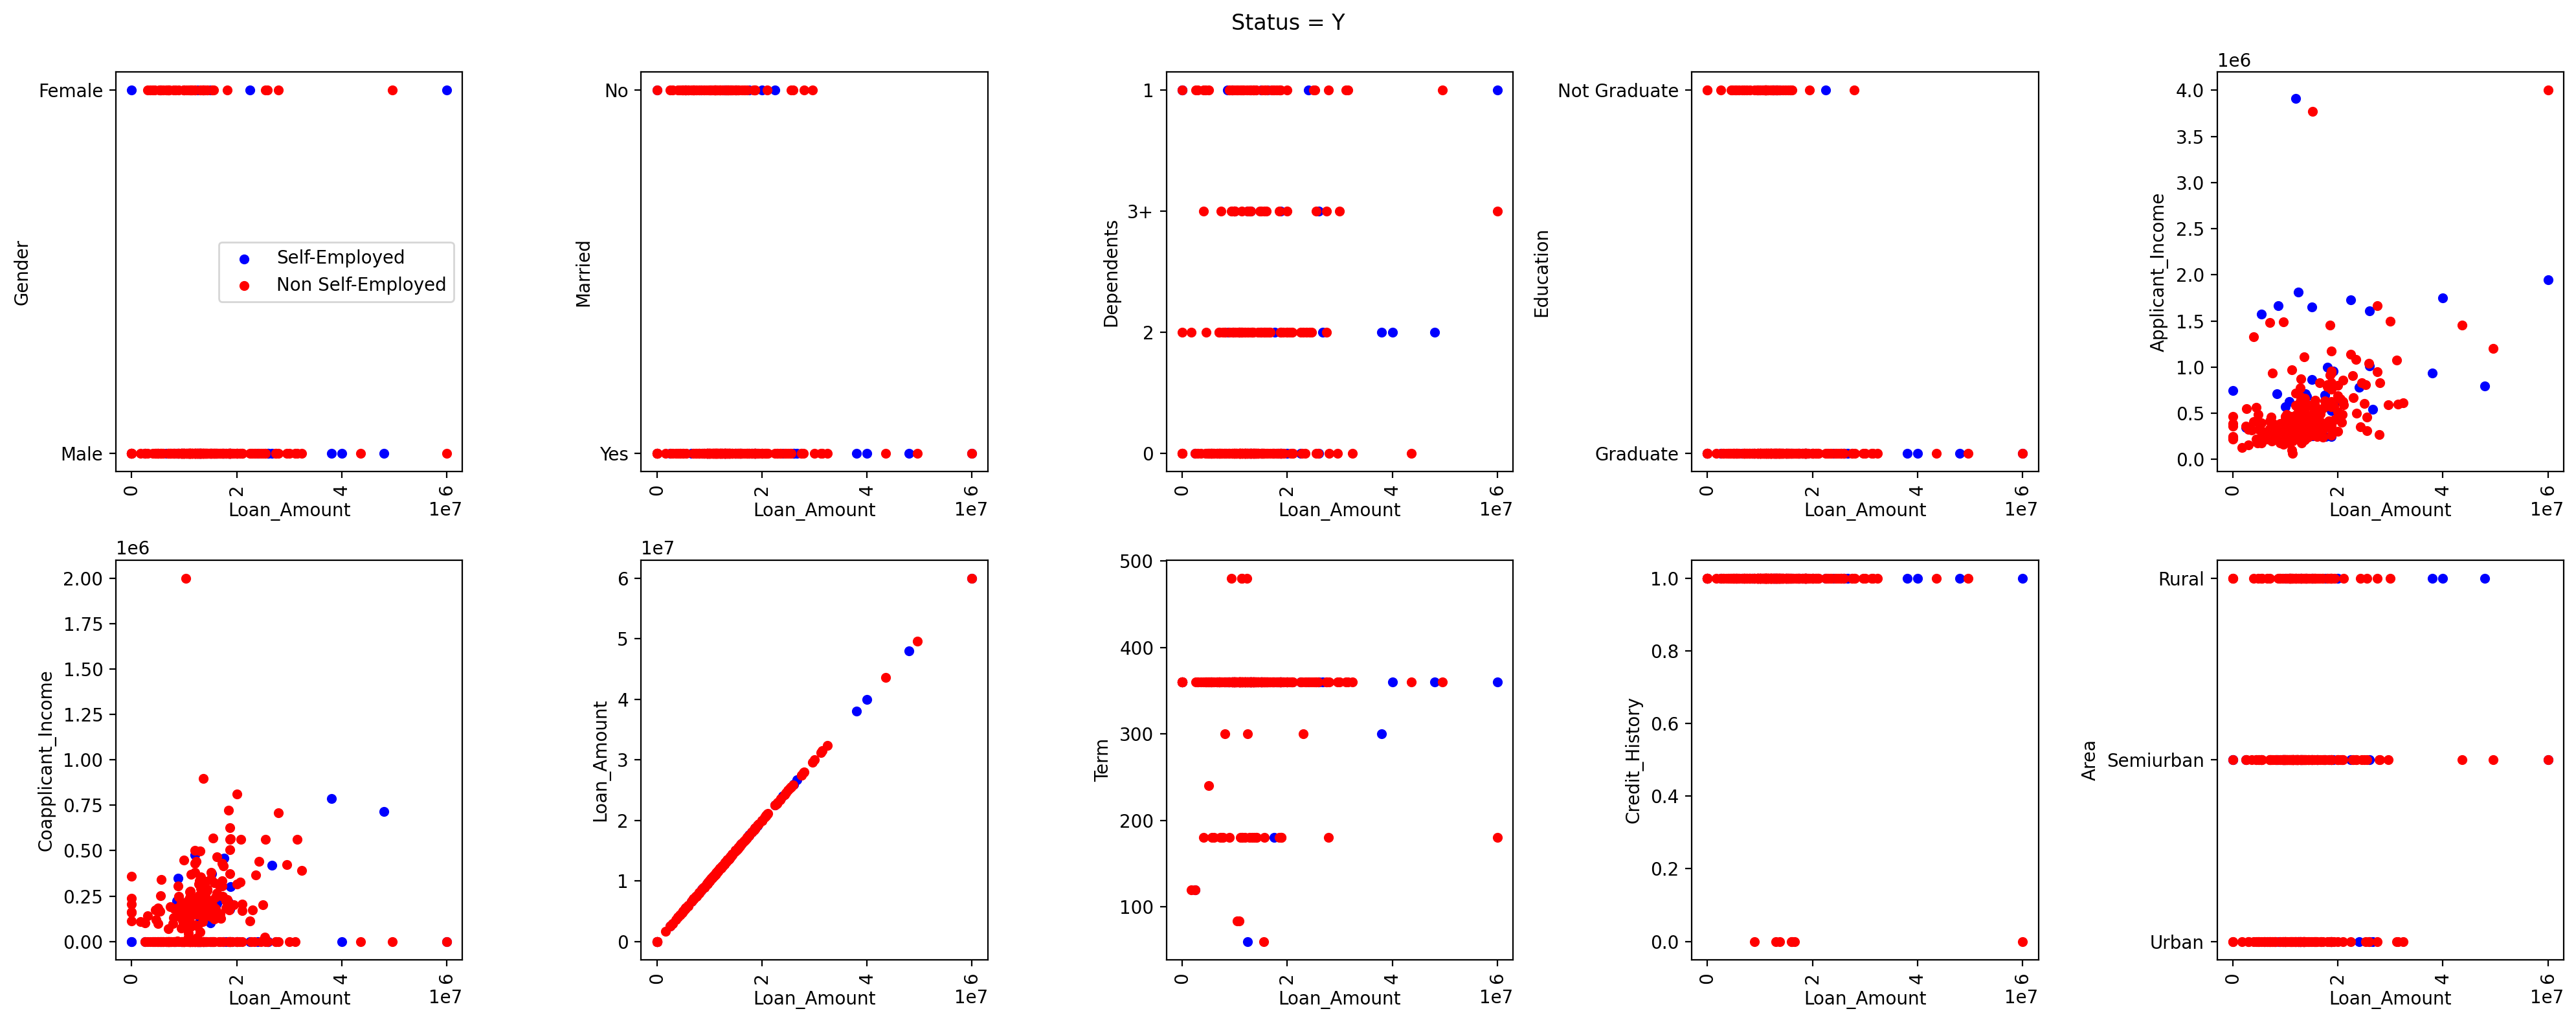

In [16]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = Y')
for i, f in enumerate(df.drop(columns=['Self_Employed', 'Status'])):
    df[(df['Status']=='Y') * (df['Self_Employed']=='Yes')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    df[(df['Status']=='Y') * (df['Self_Employed']=="No")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Self-Employed', 'Non Self-Employed'])
plt.tight_layout()

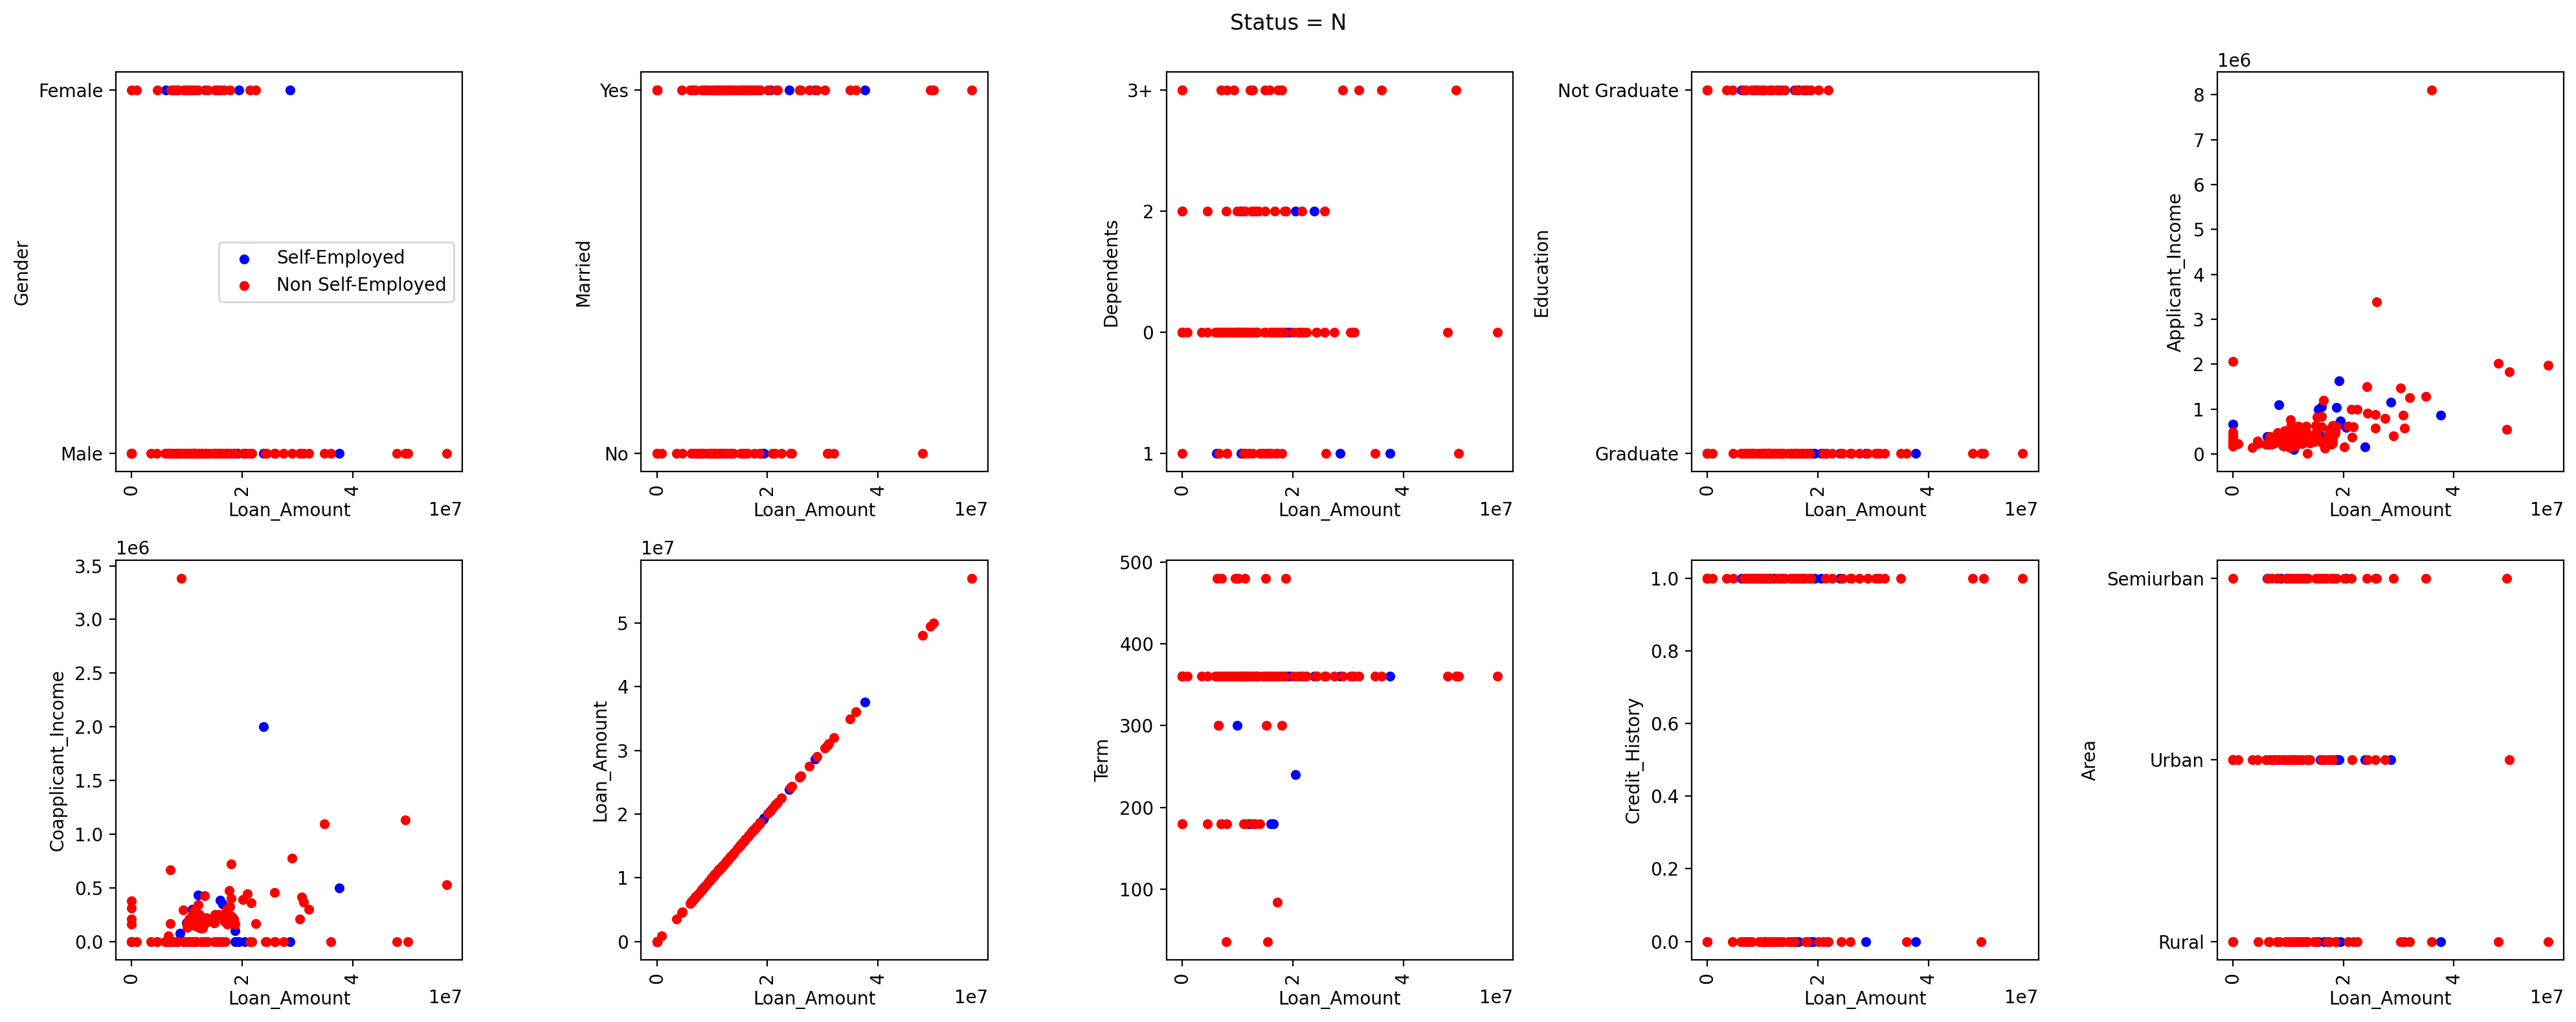

In [17]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = N')
for i, f in enumerate(df.drop(columns=['Self_Employed', 'Status'])):
    df[(df['Status']=='N') * (df['Self_Employed']=='Yes')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    df[(df['Status']=='N') * (df['Self_Employed']=="No")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Self-Employed', 'Non Self-Employed'])
plt.tight_layout()

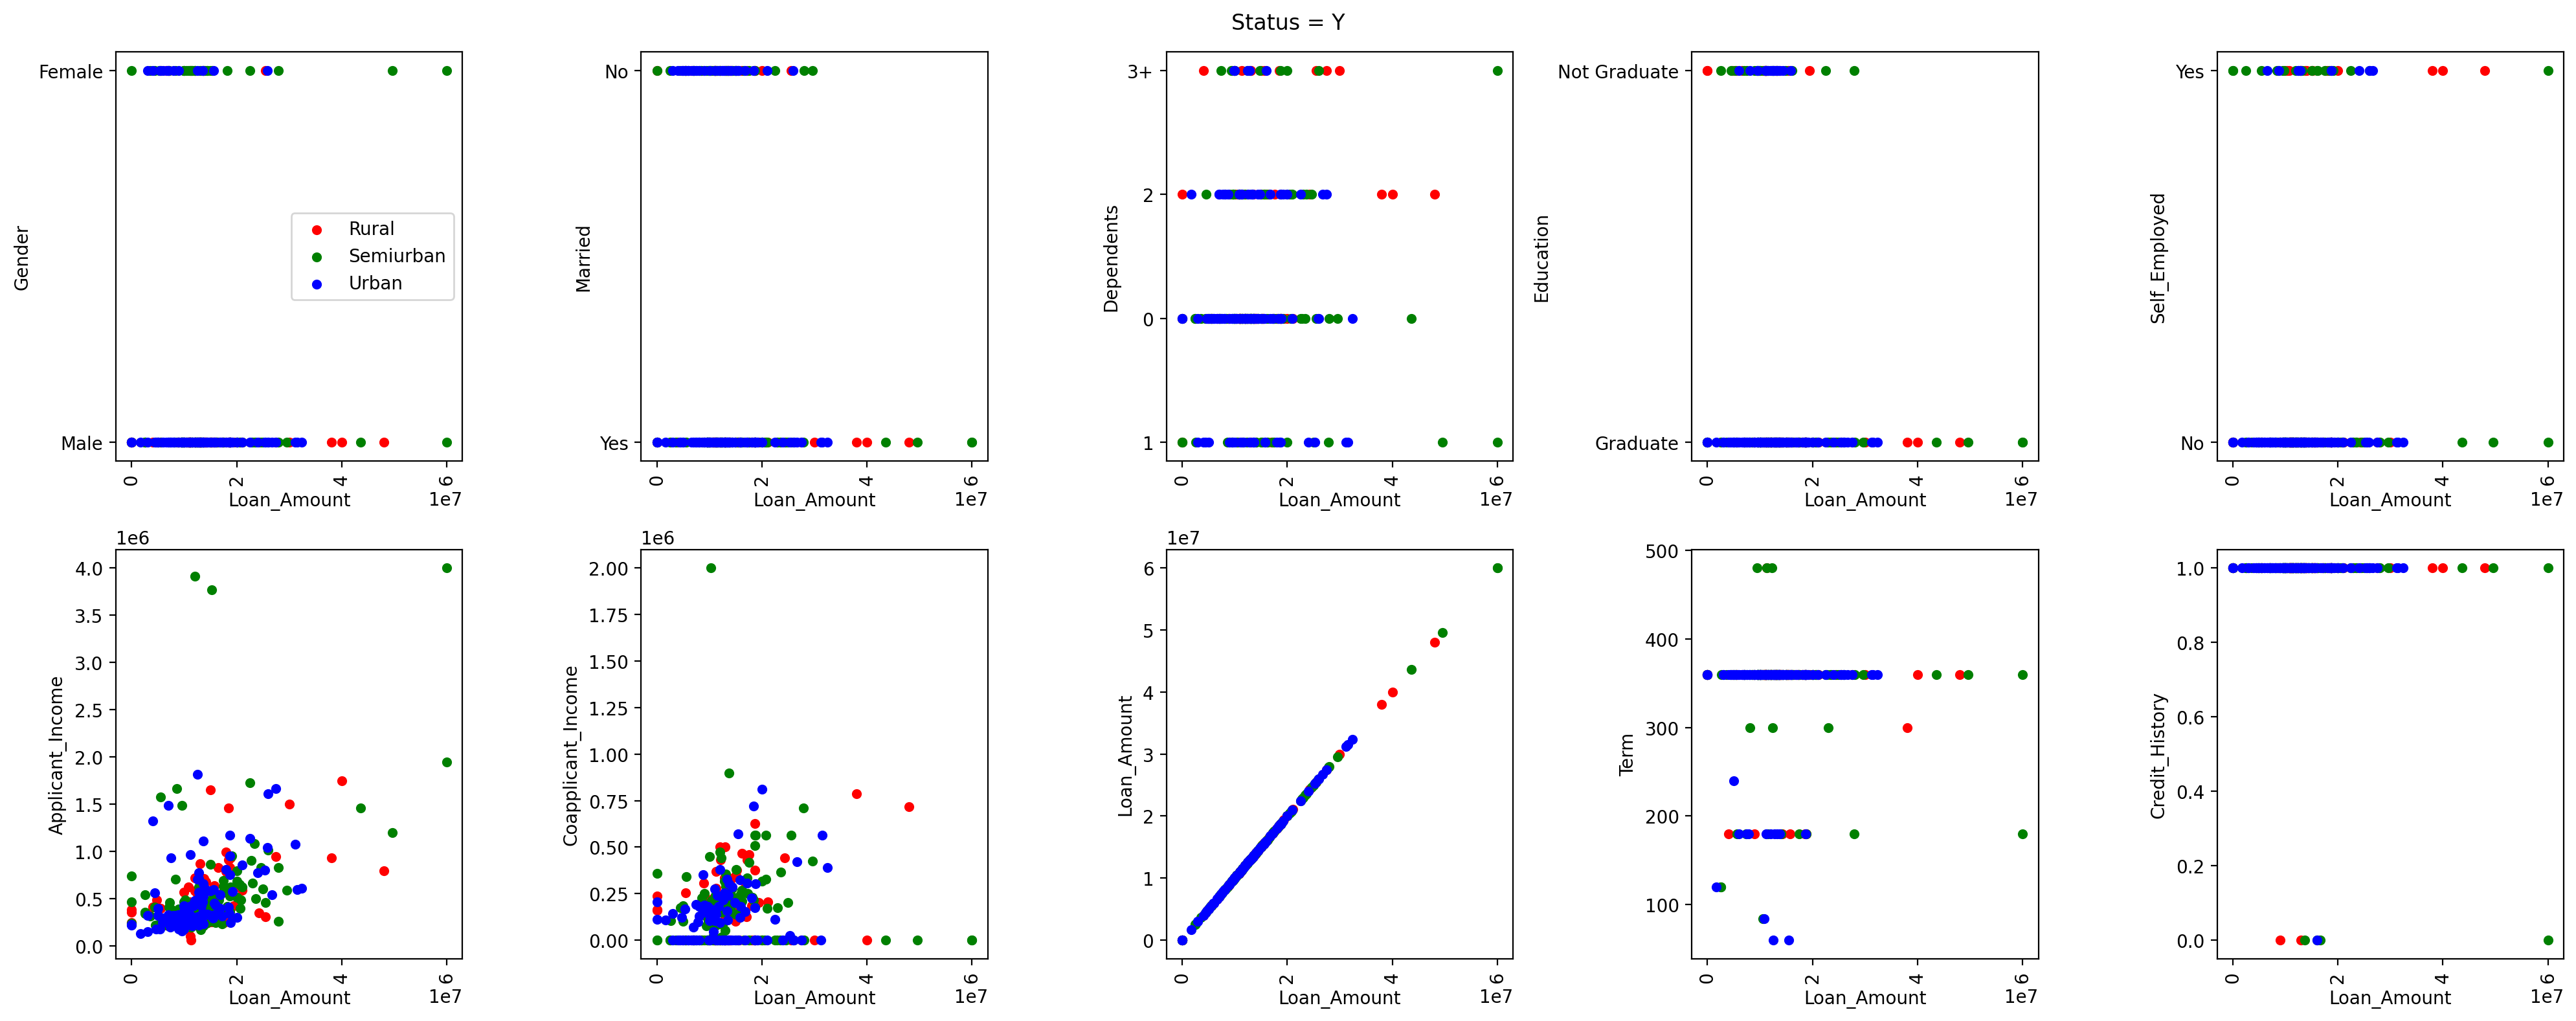

In [18]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = Y')
for i, f in enumerate(df.drop(columns=['Area', 'Status'])):
    df[(df['Status']=='Y') * (df['Area']=='Rural')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    df[(df['Status']=='Y') * (df['Area']=="Semiurban")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='g')
    df[(df['Status']=='Y') * (df['Area']=="Urban")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Rural', 'Semiurban', 'Urban'])
plt.tight_layout()

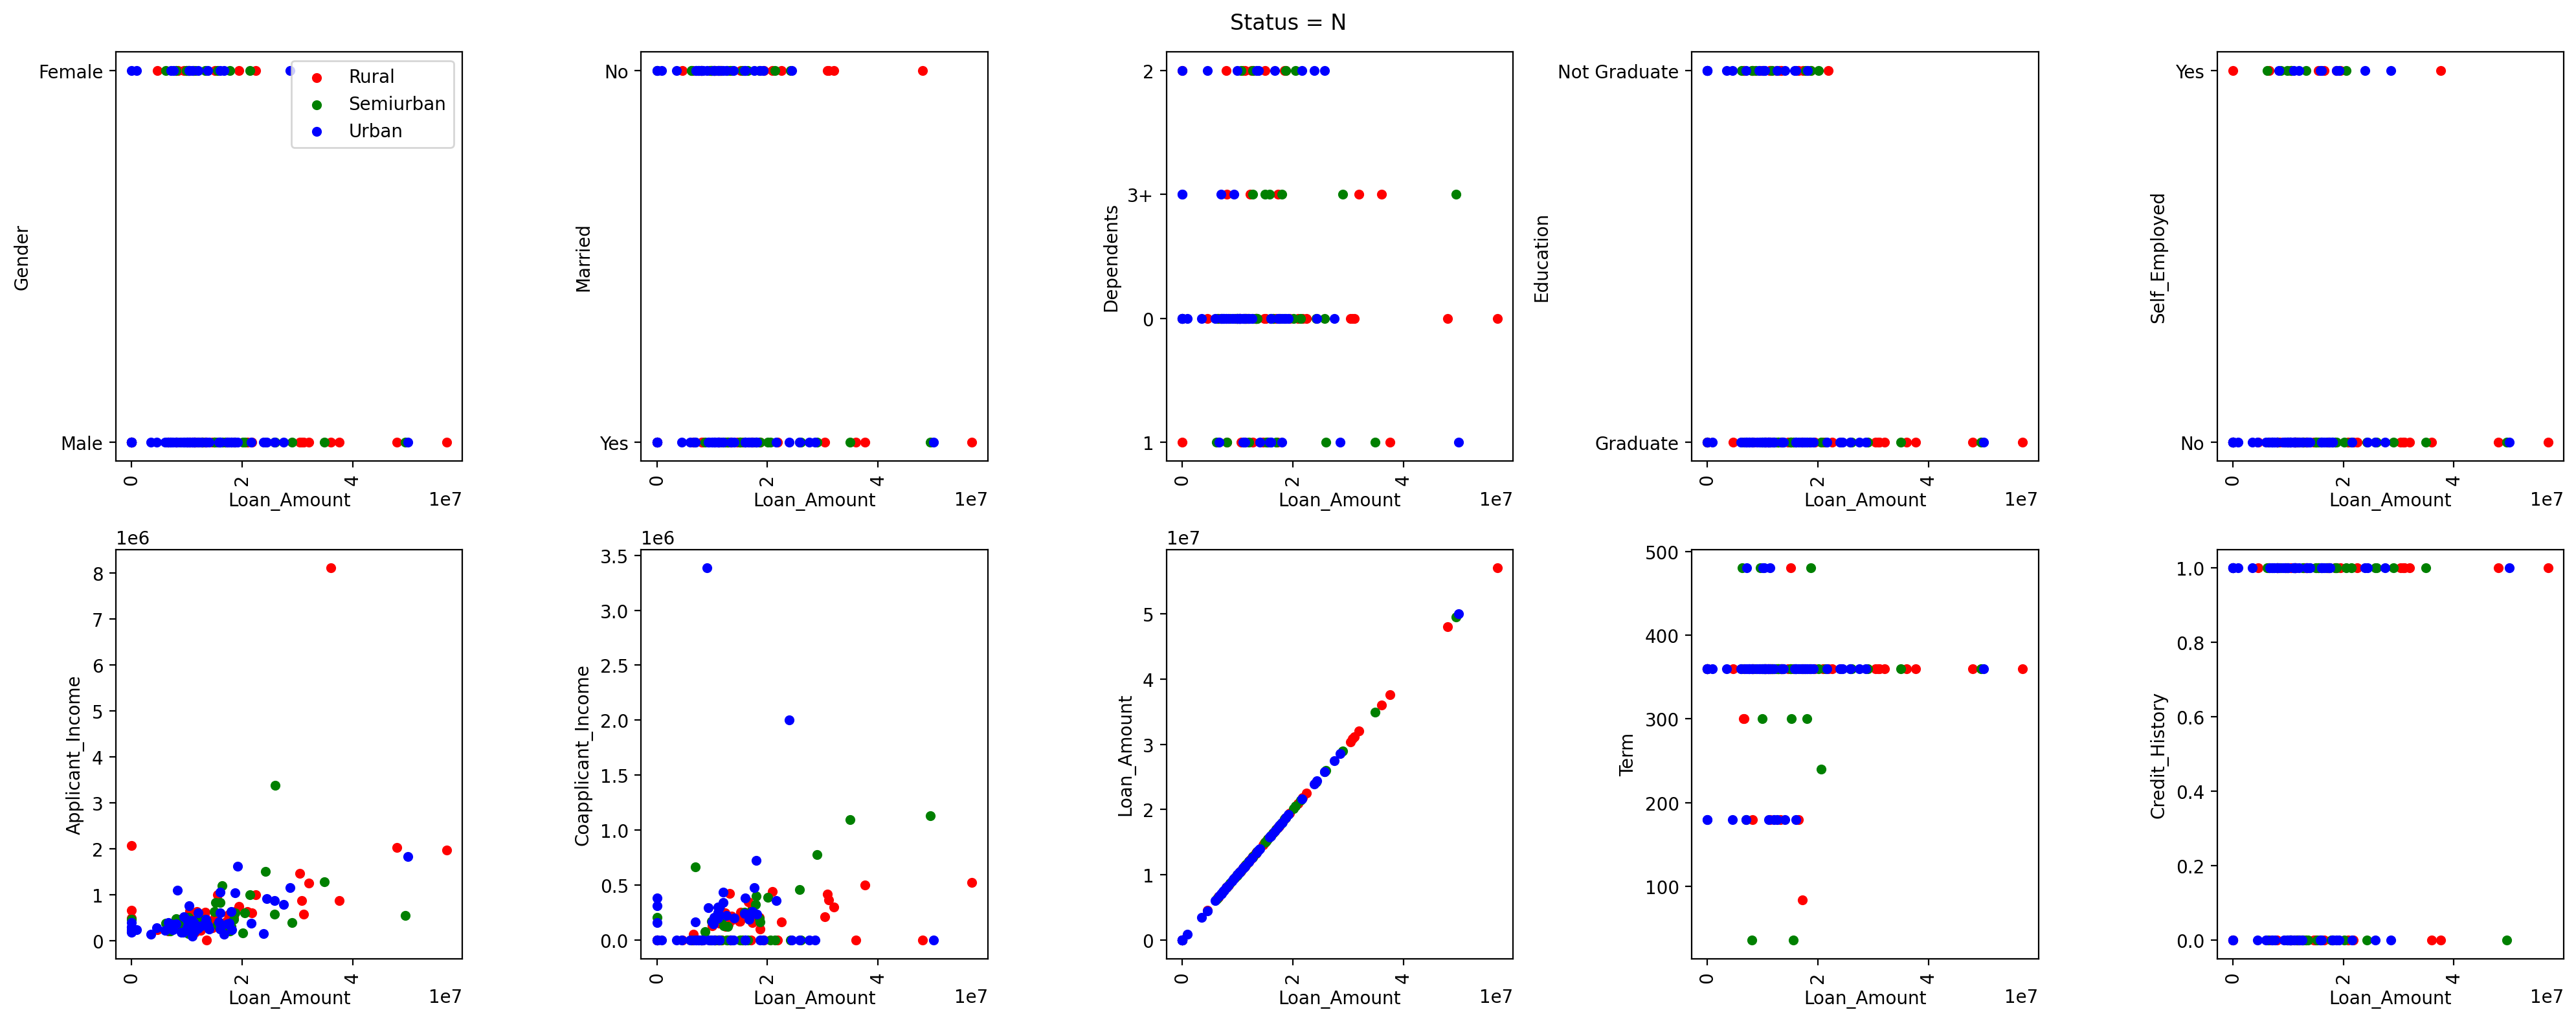

In [19]:
fig, axes = plt.subplots(figsize=(20,8), ncols=5, nrows=2, dpi=200)
fig.suptitle('Status = N')
for i, f in enumerate(df.drop(columns=['Area', 'Status'])):
    df[(df['Status']=='N') * (df['Area']=='Rural')].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='r')
    df[(df['Status']=='N') * (df['Area']=="Semiurban")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='g')
    df[(df['Status']=='N') * (df['Area']=="Urban")].plot("Loan_Amount", f, subplots=True, kind='scatter', ax = axes[i//5, i%5], color='b')
    axes[i//5, i%5].tick_params(axis='x', labelrotation=90)
axes[0,0].legend(['Rural', 'Semiurban', 'Urban'])
plt.tight_layout()

In [20]:
le = LabelEncoder()
df_encode= df.copy()
for i, f in enumerate(df.select_dtypes(include="object")):
    le.fit(df_encode[f])
    print(list(le.classes_))    
    df_encode[f] = le.fit_transform(df_encode[f])
df_encode.head()

['Female', 'Male']
['No', 'Yes']
['0', '1', '2', '3+']
['Graduate', 'Not Graduate']
['No', 'Yes']
['Rural', 'Semiurban', 'Urban']
['N', 'Y']


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1


<Axes: >

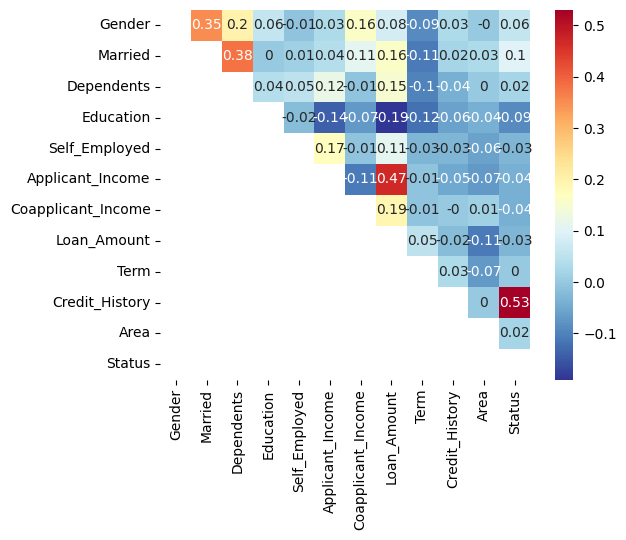

In [21]:
corrs = df_encode.corr()
corrs = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
sns.heatmap(np.round(corrs,2), cmap="RdYlBu_r",  square=True, annot=True)

In [22]:
fig = px.imshow(np.round(corrs,2), text_auto=True)
fig.show()

Выводы по эксплоритарному анализу: большое количесво степеней свободы, выдача заема зависит от кредитной истории. А сумма заема коррелирует с доходом. Для женского пола меньше заявок, но запрос на заем примерно такой при таком же доходе как и у мужского пола.

## Задание 1.3

Построить и оценить качество бейзлайна

Комментарий: В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

Критерии оценки:

- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла
- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5 балла
- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла
- Продемонстрировать использование библиотеки plotly для визуализации

Ответ:

Далее рассмотрим только столбцы Data и Open, так как остальные столбцы коррелируют между собой.

Для разбеения выборки на тренеровочный и тестовй применялася TimeSeriesSplit 

In [23]:
X, y = df_encode.drop(columns='Status'), df_encode["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

<Axes: ylabel='Density'>

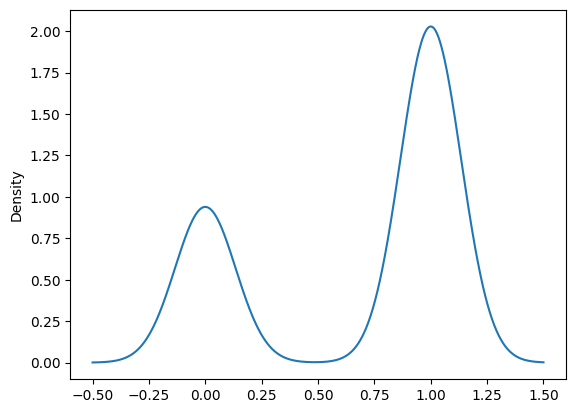

In [24]:
y.plot(kind='kde')

In [25]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)
print(classification_report(y_test, y_preds_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.70      1.00      0.82        87

    accuracy                           0.70       125
   macro avg       0.35      0.50      0.41       125
weighted avg       0.48      0.70      0.57       125



In [26]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_preds_lg = lg.predict(X_test)
print(classification_report(y_test, y_preds_lg))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.76      0.99      0.86        87

    accuracy                           0.78       125
   macro avg       0.84      0.64      0.65       125
weighted avg       0.81      0.78      0.73       125



In [27]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.40      0.26      0.32        38
           1       0.72      0.83      0.77        87

    accuracy                           0.66       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.62      0.66      0.63       125



In [28]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns
)

In [29]:
lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_preds_lg_sc = lg.predict(X_test)
print(classification_report(y_test, y_preds_lg_sc))

              precision    recall  f1-score   support

           0       0.50      0.05      0.10        38
           1       0.70      0.98      0.82        87

    accuracy                           0.70       125
   macro avg       0.60      0.51      0.46       125
weighted avg       0.64      0.70      0.60       125



In [30]:
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train_scaled, y_train)
y_preds_dummy_sc = dummy.predict(X_test)
print(classification_report(y_test, y_preds_dummy_sc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.70      1.00      0.82        87

    accuracy                           0.70       125
   macro avg       0.35      0.50      0.41       125
weighted avg       0.48      0.70      0.57       125



In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_preds_knn_sc = knn.predict(X_test)
print(classification_report(y_test, y_preds_knn_sc))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        38
           1       0.70      0.99      0.82        87

    accuracy                           0.70       125
   macro avg       0.60      0.51      0.43       125
weighted avg       0.64      0.70      0.59       125



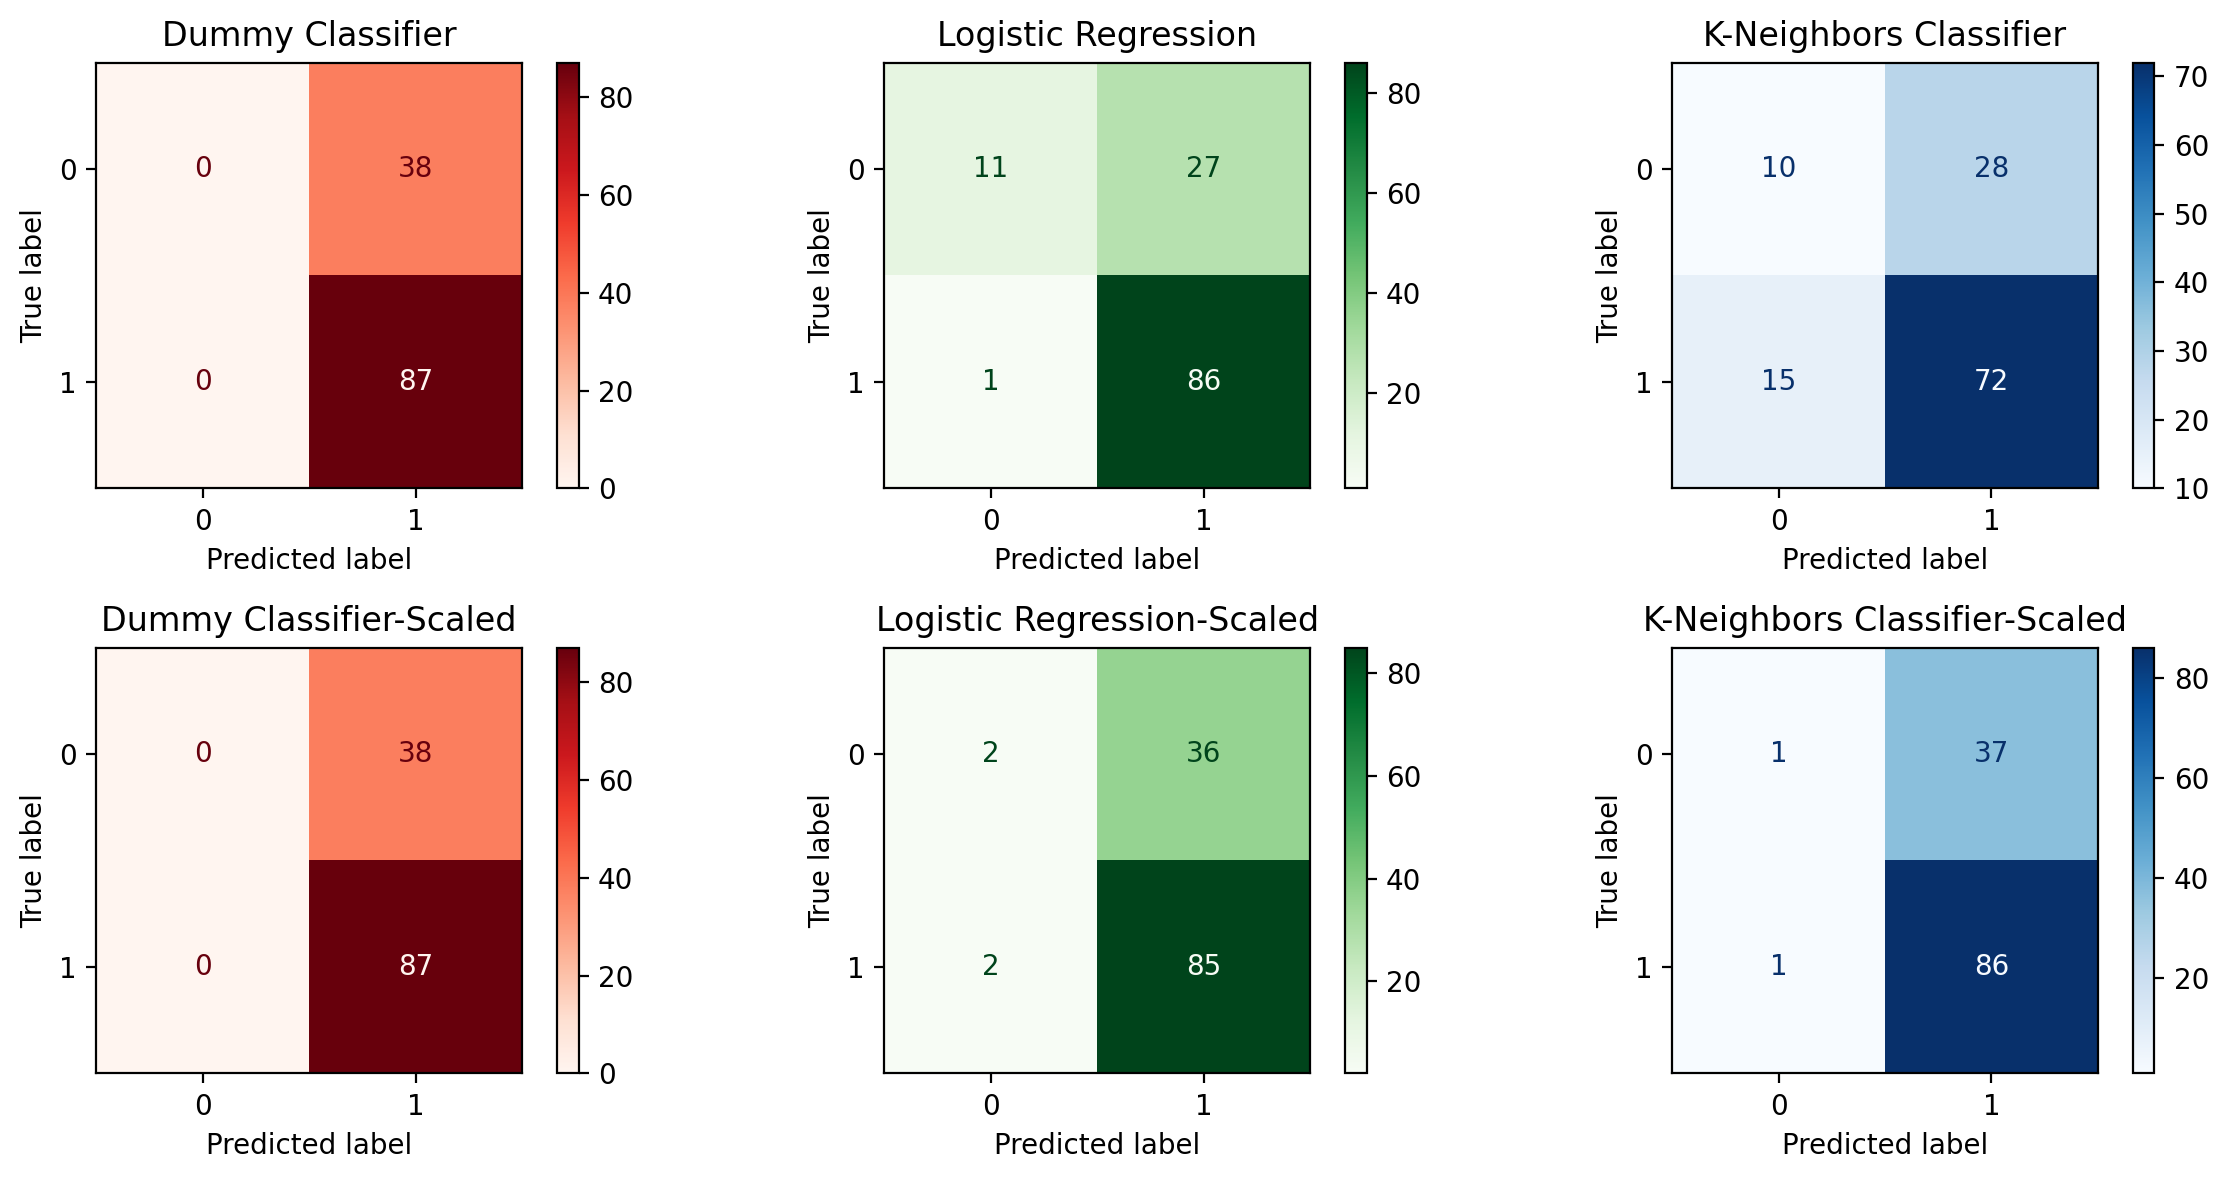

In [32]:
fig, axes = plt.subplots(ncols=3, nrows=2, dpi=200, figsize=(12,6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_dummy)).plot(cmap='Reds', ax=axes[0][0], )
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_lg)).plot(cmap='Greens', ax=axes[0][1])
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_knn)).plot(cmap='Blues', ax=axes[0][2])
axes[0][0].set_title("Dummy Classifier")
axes[0][1].set_title("Logistic Regression")
axes[0][2].set_title("K-Neighbors Classifier")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_dummy_sc)).plot(cmap='Reds', ax=axes[1][0], )
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_lg_sc)).plot(cmap='Greens', ax=axes[1][1])
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_knn_sc)).plot(cmap='Blues', ax=axes[1][2])
axes[1][0].set_title("Dummy Classifier-Scaled")
axes[1][1].set_title("Logistic Regression-Scaled")
axes[1][2].set_title("K-Neighbors Classifier-Scaled")

plt.tight_layout()

Выводы: 

Были рассмотренные различные модели классификации. Наилучший результат показала логистическая регрессия, однако после скалированния результат, увеличлось количесво ложных ответ (видно из confusion_matrix).